# Ordinary Differential Equation Solver "Odie:" a Tutorial

## Authors: Gabriel M Steward

### January 2023

https://github.com/zachetienne/nrpytutorial/blob/master/Tutorial-Template_Style_Guide.ipynb

Link to the Style Guide. Not internal in case something breaks. 

### </list_source_code> NRPy+ Source Code for this module:
[RK_Butcher_Table_Dictionary.py](/edit/RK_Butcher_Table_Dictionary.py)

[cmdline_helper.py](/edit/cmdline_helper.py)

[outputC.py](/edit/outputC.py)

## Introduction:
Welcome to the Ordinary Differential Equation Solver Tutorial notebook, wherin we will both showcase a program that solves Ordinary Differential Equations and instruct users on how to use it.

This Ordinary Differential Equation Solver, affectionately known as "Odie," takes a system of Ordinary Differential Equations (ODEs) with initial boundary conditions and solves it numerically, the result being a text file with the previously unknown functions' values. The code is generic and can use any Runge Kutta-style method to solve the ODE. 15 different options ranging from first to eighth order are avialable within this notebook, and if the user has a butcher table that defines a unique method, it can be inserted manually. In addition, the program supports an internal validation check which checks the initial order of the error, so long as a known solution is provided--but this is not necessary for the program to operate.

This code is still a work in progress. In the future we intend to give it adaptable time-step functionality and make it more user friendly. 

The user can specify a several values in the Customization section ([Step 5a](#S5a) below) including the method, the step size, the number of steps, where to start evolving, etcetera. If the differential equations or initial conditions need to be changed the code itself has to be altered, but for most equations this won't be difficult, and one of the purposes of this notebook is to instruct users on how exactly to do that.  

## </other>  Other:
A note: this notebook attempts to be a proper tutorial, but it is under construction, so suggestions are welcome. 

### Note on Notation:
Any new notation will be brought up in the notebook when it becomes relevant. 

### Citations:

Matplotlib documentation. (Needs no citation?) 

<a id='1'></a>
[1] https://en.wikibooks.org/wiki/C_Programming/time.h (Using time.h)

<a id='2'></a>
[2] https://askubuntu.com/questions/332884/how-to-compile-a-c-program-that-uses-math-h (math.h compilation requirements)

<a id='3'></a>
[3] https://www.tutorialspoint.com/cprogramming/c_file_io.htm (Basic file operations)

<a id='4'></a>
[4] Numerical Mathematics and Computing 6E by Cheney and Kincaid (Primary Text)

<a id='5'></a>
[5] NRPy+ "Solving the Scalar Wave Equation" (Plotting code, surprisingly)

<a id='6'></a>
[6] https://www.dataquest.io/blog/read-file-python/ (Opening and reading CSV files)

<a id='7'></a>
[7] https://stackoverflow.com/questions/332289/how-do-i-change-the-size-of-figures-drawn-with-matplotlib (Changing size of plot)

<a id='8'></a>
[8] https://stackoverflow.com/questions/37538/how-do-i-determine-the-size-of-my-array-in-c (Need to determine what we are being handed by the butcher tables.)

<a id='9'></a>
[9] https://stackoverflow.com/questions/2753254/how-to-open-a-file-in-the-parent-directory-in-python-in-appengine (how to move up out of a Python directory.)

<a id='10'></a>
[10] https://www.gnu.org/software/gsl/doc/html/intro.html (GSL algorithms)

<a id='toc'></a>

# Table of Contents
$$\label{toc}$$

1. [Step 1:](#S1) Background: The Problem Statement

    2. [Step 1a:](#S1a) Validation Method

3. [Step 2:](#S2) The Code

3. [Step 3:](#S3) Simple Problem Example

    4. [Step 3a:](#S3a) Simple Problem Customization

    4. [Step 3b:](#S3b) Simple Problem Python-Code

    5. [Step 3c:](#S3c) Simple Problem C-Code

    6. [Step 3d:](#S3d) Simple Problem Results
    
    6. [Step 3e:](#S3e) Simple Problem Analysis
        
    6. [Step 3f:](#S3f) Multiple Run Examination
    
7. [Step 4:](#S4) Complicated Problem Example

    4. [Step 4a:](#S4a) Complicated Problem Customization

    4. [Step 4b:](#S4b) Complicated Problem Python-Code

    5. [Step 4c:](#S4c) Complicated Problem C-Code

    6. [Step 4d:](#S4d) Complicated Problem Results
    
    6. [Step 4e:](#S4e) Complicated Problem Analysis

7. [Step 5:](#S5) User-Defined Problem Section

    4. [Step 5a:](#S5a) Customization

    4. [Step 5b:](#S5b) Python-Code

    5. [Step 5c:](#S5c) C-Code

    6. [Step 5d:](#S5d) Results
    
    6. [Step 5e:](#S5e) Analysis

8. [Step 6:](#S6) Conclusion

8. [Step 7:](#S7) Questions/Ecercies(?)

9. [Step 8:](#S8) Output this notebook to $\LaTeX$-formatted PDF file

<a id='S1'></a>

# Step 1: Background: The Problem Statement \[Back to [top](#toc)\]
$$\label{S1}$$

#### In order to solve a problem, one must first know the problem exists.

Before we get into the code and instruct potential users on how to use it, we first need to specify exactly what sorts of problems it can solve. 

This program seeks to take a system of Ordinary Differential Equations and solve it. To be clear, an Ordinary Differential Equation is an equation relating a function and its derivatives together, with the requirement that all derivatives be taken with respect to a single variable. If multiple variable derivatives are involved, it becoems a Partial Differential Equation. While the program only solves systems of first-order ODEs, every higher-order ODE can be split up into a system of first-order ODEs, thus the program can solve any order ODE so long as the user splits it up into a system first, which is always possible for ODEs. 

Mathematically, our program can solve equations of the form

$$ \frac{dy(x)}{dx} = f(x,y(x)) ; \text{ given } y(a)=b$$

where a system would take the form

$$ \frac{dy_n(x)}{dx} = f(x,y_n(x)) ; \text{ given } y_n(a)=b_n$$

where $f$ is some function that does not contain any derivative or integral operators. A solution is to find what the functions $y_n(x)$ actually are. The given $y_n(a)=b_n$ are the boundary conditions for this problem. For this solver we start at the point $a$ and increase it over time, treating $a$ as the start of an "initial condition." 

The program will restrict itself to Runge-Kutta type solution methods, which take an initial condition and evolve it forward in "time" with various relational methods, all of which are based in the Taylor Series Expansion. The specifics of these methods can be found elsewhere ([here](https://nbviewer.org/github/zachetienne/nrpytutorial/blob/master/Tutorial-RK_Butcher_Table_Dictionary.ipynb)). The basic idea is that one value is used to calculate another value forward in "time," and this new value can be used to find the next one, and so on and so forth. Since we start with an initial condition, we can always use such methods. 

<a id='S1a'></a>

## Step 1a: Validation Method \[Back to [top](#toc)\]
$$\label{S1a}$$

#### A program is worse than useless if it doesn't work and you don't know it.

An important part of simulation codes is validation--does the program do what we expect it to do when presented with known data? Granted, oftentimes we simply do not know what we are looking for and have nothing to compare against. However, as this is a general ODE Solver, it can be put to the task of solving problems with well-known answers and we can compare the program's solution with the real solution to determine if it is working. 

When the closed-form answer to a problem is known, it can be inserted into the program, and the program will attempt to find the order of the initial error. Every method we use has an associated error term with it, $\mathcal{O}(h^m)$ where $m$ is some integer that indicates the order of the error term. A first-order method would have $m=2$ since the method accurately represents terms up to $m=1$, and then the initial error is $m=2$. In other words, a method of a certain order gets everything right up to that order, but not beyond it.

At the moment, we are concerned with the error with respect to the step size, which is how far in "time" we evolve the solution with every calculation. The question is, how exactly do we determine the order of a method from the data alone? 

To start, we can extract the error with the rather simple relation 

$$ \text{Truth} - \text{Calculation} = \text{Error} = \mathcal O(h^m) $$

Now, O-notation is somewhat ambiguous, for we do not know how large the term it represents is, and there can be terms of order higher than $m$ that are supressed. If we assume that the $m$-order term dominates all the others, then we can write out

$$ E \approx Ah^m,$$

where $E$ is error, $A$ is some unknown constant, $h$ is the step size, and $m$ is the order. 

Let us say that we were to perform this error calculation twice: once for some unknown step value $h$, and once for precisely half, $h/2$. This would produce two different error values. 

$$ E_1 = Ah^m; E_2 = A \frac{h^m}{2^m}$$

We can solve both of these equaitons for $A$, which is the same in both.

$$ A = \frac{E_2}{h^m / 2^m} = \frac{E_1}{h^m} $$

From here we can just solve for $m$.

$$ \Rightarrow \frac{E_2}{E_1} = \frac{1}{2^m} $$
$$ \Rightarrow \frac{E_1}{E_2} = 2^m $$
$$ \Rightarrow m = log_2 \frac{E_1}{E_2} $$

Keep in mind that $m$ is the order of the error term, the actual order of the method used would be $m-1$ in this case. So a first-order method would have $m=2$. Also be careful to keep the "1" and "2" subscripts on the errors in the right sequence; the $E_2$ term comes from the halved step size. 

This method is very convenient for a few reasons. For one, it doesn't require any Taylor Series terms or any inputs aside from the first error terms of two separate calculations. In addition, the errors should be taken from the *first* step which means it isn't necessary to perform the calculations for the entire ODE twice just to get an order estimate. 

It does have a rather major failing though, and that comes with its primary assumption: that the errors are dominated by a single term. This need not be the case and often changes based on the step size. The other higher-order error terms do influence the result, and they can do it in unexpected ways, and as such the result $m$ will rarely, if ever, actually be an integer. However, as we know it *should* be an integer, if we round the number all the problems from the other terms will usually go away, though not always. Fortuantely, as this validation is largely for the method itself and not the answer, it's always possible to just insert a different more well-behaved function for validation. Higher order methods break this validation check more often than lower order methods, since higher order methods regularly hit roundoff error at low step sizes, larger step sizes are required to get actual error--and larger step sizes mean the relative differences between terms get smaller. 0.1 reduces things by a factor of ten, which is regularly overruled by the leading cosntant, but 0.01's hundredth tends to win out. So it's very context dependent! 

There is a quirk that occurs if the Taylor Series Expansion of a solution is missing terms (or is finite). Say, for instance, the $m=3$ term was missing and we had an order 2 solver. Well, the order detector expects to find $m=3$, but instead it finds $m=4$ since there isn't any $m=3$ error term to find. This is not a problem, it is perfectly fine for a method to have an order *higher* than expected. Lower is when there would be a problem. Similar issues occur if the soluiton is exact or near exact, in which case the validation will claim the error order is infinite. 

This naive validation does not fulfill our complete needs to check the code, for that we need to compare the results with those from a trusted solver for a specific system of ODEs. If the analytic solution is known, the program can do this automatically and report error for the user to interpret. Often, however, we do not have an analytic solution and must trust the program, which is why validation checks on various types of problems that are known is important. For isntance, in one of our examples we solve a set of equations known as the TOV equations and compare it with trusted data from a previous solver for further validation. 

Now that we have our tools, we are prepared to look at the actual program. 

<a id='S2'></a>

# Step 2: The Code \[Back to [top](#toc)\]
$$\label{S2}$$

#### Odie is our friend, but do we understand our friend?

Before looking at the code itself, lets first discuss how it operates. Prior to running the code, it is important to know that the user can manually set certain things in the code itself. Within the funciton `diffyQEval` lies the definition of the differential equations that make up the system of ODEs. We have several examples set up to demonstrate how a user can cusotmize these functions. `diffyQEval` takes three arguments: `x`, `y`, and `c`. `x` is a number that describes position, usually thought of as "time" but it could easily be "radius" or just "distance." `y` is an array that contains values for each equation in the system that will be used to evaluate the differential equaitons at point `x`. `c` is an array that holds constants, and is not always used, but sometimes there are quantities we wish to track that are related to the system of ODEs but not explicitly evaluated as an ODE.  

`getInitialConditions` is a function that does exactly what it says: it takes an array `y` and fills it with the initial conditions specified within. The user is expected to provide these conditions, one for each differential equation.

`constEval` is similar to `diffyQEval` except it doesn't evaluate derivatives, it just calculates what the constants in `c` should be based on the values passed in `y`. This function may be entirely empty in certain implementaitons. 

`knownQeval` is only used when we wish to run validation checks against a known equation, in which case it contains the solutions to the differential equations. It is passed `x` and `y`, evaluating each solution at the given points and returning `y` with the adjusted values. 

`doWeTerminate` is another optional function. It takes in `x`, `y`, and `c`. The user is able to specify any sort of check imaginable on these parameters, and if the check triggers, the function returns 1, indicating that the program a as a whole should stop. This could be used to abort if the program hits a well-known error, or if a user doesn't know precisely how many steps to take but does know how big a variable should get before termination. 

`exceptionHandler`is another optional function, different from the prior in that it doesn't just perform a check, it changes data passed to it. It takes in `x`, `y`, and `c`, examining them for any condition the user can think of. If a condition is found, it will modify the data passed to it. Say, for instance, we have a differential equation with a square root in it, but the value within is very close to zero several times during evaluation. An estimation method may accidentially dip into negative numbers, and the square root of a negative number will result in NaN results. The exceptionHandler can see this negative value ahead of time and set it to zero to ensure calculation still goes smoothly. 

There are a set of mutable parameters that determine how the simulation is run, both of which can be set within this notebook in the Customization section ([Step 2a](#S2a) below). `step` is the step size. Smaller `step` numbers mean better accuracy generally. `bound` is the value we start evaluating from--be it $t=0$, $x=1$, or $r=3.14159$. It can be anything real. `SIZE` is how large the area we're solving for is measured in the number of steps. We start at `bound`, but `SIZE` determines where we end.

In addition, the method can also be chosen by setting `key` to one of the many options for solving methods, which are listed in the Customization section. "RK4" is the standard choice.

Lastly, there is a boolean variable `validate` which should be set to true if validation is desired, and false if not. Validation should only be done if a known solution has been provided in `knownQEval`, otherwise it should be set to false. The program will still run without a known solution, it'll just spit out junk data if `validation` is set to true. Note: the output of the program is notably different when validation is set to true or false, all users should take care not to feed data from a validation run into a program designed to read non-validation data files. 

Once all these parameters are set, the notebook can be run, and the first thing it does is construct the chosen method from NRPy+'s library, crafting a "butcher table" that the C-code can put into use. After that, it opens a new folder to put all the C-related files into, and uses NRPy+'s `OutputC` functions to create the actual function that does the evaluating. 

Once all the setup with Python is done, the C-code activates, sets up a timer to let the user know how many seconds the operation took (we can remove this now, NRPy does this automatically), and opens a file to write all the output to. After that, it executes the chosen method via the butcher table, the specifics of which we shall not go into since they are described elsewhere ([here](https://nbviewer.org/github/zachetienne/nrpytutorial/blob/master/Tutorial-RK_Butcher_Table_Dictionary.ipynb)). What should be noted is that on the first step, if `validation` is set to true, the code will attempt to evaluate the order of the error. It will always spit out something (even if that something is NaN or infinity), but any of these non-number results genreally mean the solution is "too accurate" and the method is looking at computer roundoff error rather than actual error inherent in the method itself. If validation is still desired for a high accuracy method, increasing the step size should do the trick, within reason.

With the calculation complete, the program closes the file it was writing to ( usually `oData.txt`), reports the time taken in seconds, and ends. It makes sure to add commas so the output can also be read as a .csv, which is useful for analysis with Python, which we will do at the end of this notebook. 

What follows are two full examples of using the code: a simple differential equation u''=u+x that shows how validation and error reporting work, and a much more complicated system from General Relativity known as the TOV equations that will show the solver's ability to work without any known solutions. 

<a id='S3'></a>
# Step 3: Simple Problem Example \[Back to [top](#toc)\]
$$\label{S3}$$

#### Always begin with something easy to grok.

Our Simple Problem that we will use as a demonstration of the code is stated as:

$$ \frac{\partial^2 u}{\partial x^2} = u + x; u(0) = 2, \frac{\partial u(0)}{\partial x} = -1 $$

This is a second order differential equation. We can split it up into two first-order equations like so:

$$ u' = z ; u(0) = 2$$
$$ z' = u + x ; z(0) = -1$$

And now it is in a form that the program can solve.

<a id='S3a'></a>

## Step 3a: Simple Problem Customization  \[Back to [top](#toc)\]
$$\label{S3a}$$

#### Even the simplest problems need some setup. 

Here is where users can adjust information in the notebook to adjust how the program runs. These changes only apply to the Simple Example, the Complicated Example and the final fully customizable code have their own customization sections. 

In [1]:
#This is the method variable, used to choose how the program calculates the result. 
key = "DP8"
#Possible options: "Euler" (Order 1), "RK2 Heun" (Order 2), "RK2 MP" (2), 
#"RK2 Ralston" (2), "RK3" (3), "RK3 Heun" (3), "RK3 Ralston" (3), "SSPRK3" (3),
#"RK4" (4), "DP5" (5), "DP5alt" (5), "CK5" (5), "DP6" (6), "L6" (6), "DP8" (8) 

#This is the step size. 
step = "0.05"
#Can be any number, 0.01 by default. Note that this is a string--we are passing it to
#the C code generator as a string. Be very careful not to declare it as something that isn't
#a number. 

#This is the number of steps.
size = "20"
#Can be any integer, 1000 by default. Be sure to make it actually be an integer. 

#This is what we set to ask for validation. "true" if desired, "false" if not. Enabled for this example. 
validate = "true"

#This is the initial point we start from. Generally zero.
bound = "0.0"

#Unless you're adding another function or wish to report a constant, do not change the two settings below. 
#this is the number of equations in the system of differential equations
eNum = "2"
#make sure this is an integer.

#this is the number of constants we wish to report.
cNum = "0"
#make sure this is an integer.

#more coming eventually: functions and boundary values.
#though those two might be a while. 

<a id='S3b'></a>

## Step 3b: Simple Problem Python-Code \[Back to [top](#toc)\]
$$\label{S3b}$$

#### Can't do anything if there's nothing to do it with!

Naturally, one does not just automatically push a Python-codified Butcher table into a C-code. We have to actually grab it and format the Butcher Table in such a way that it can be understood. Which means formatting a string into a C-command based on the provided Butcher Tables from NRPy. 

In [2]:
import sympy as sp              # SymPy: The Python computer algebra package upon which NRPy+ depends
import numpy as np              # NumPy: A numerical methods module for Python
from RK_Butcher_Table_Dictionary import Butcher_dict #the Butcher Tables themselves. 

#The end result of all this should be a string with our chosen method. 
#If you want to set the method, see above. 

butcherTable = ""

#Now in order to determine what size to make our loop, we need the size of the table itself.
print(len(Butcher_dict[key][0]))
rows = len(Butcher_dict[key][0])
#TABLE CONVERSION IN PROGRESS, PICK UP TOMORROW
maxColumns = len(Butcher_dict[key][0][rows-1]) #the last row has the max columns.
print(len(Butcher_dict[key][0][rows-1]))
i = 0

#Set up th edeclaration of the double 2D array in C. 
butcherTable = butcherTable + "double butcher[" + str(len(Butcher_dict[key][0])) + "][" + str(len(Butcher_dict[key][0][rows-1])) +"] = {"

while (i < rows):
    print(len(Butcher_dict[key][0][i]))
    #The above print function helps us see that the program really is doing the entire matrix.
    columns = len(Butcher_dict[key][0][i]) 
    
    butcherTable = butcherTable + "{"
    #Even though the matrix is square, we cannot set rows=columns since 
    #The butcher tables have a lot of empty slots we will be filling with 0s. 
    j = 0
    if Butcher_dict[key][0][i][j] == '':
        butcherTable = butcherTable + str(float(Butcher_dict[key][1]))+ ","
        j = j+1
        # This is a check for the empty spot in the bottom left of the table
        # the C-code uses this to store the method order, so we put it there. 
        # The main bennefit is that this keeps the matrix square.
    while (j < maxColumns): #not < columns, since we still need to fill in 0s for 
        #the C code. 
        if (j < columns):
            butcherTable = butcherTable + str(float(Butcher_dict[key][0][i][j]))
            # Print the number requested. 
            # Note the conversion to floating point. The C-code has no clue what to
            # do with fractions, so they must be changed. 
            if (j<maxColumns-1):
                butcherTable = butcherTable + ","
                #if not at end of row, add comma. WE don't want to overdo it. 
        elif (j < maxColumns-1):
            butcherTable = butcherTable + "0"+ ","
            # if we are at the point where there are no numbers, fill with 0. 
        else:
            butcherTable = butcherTable + "0"
            # if we are at the point where there are no numbers, fill with 0. 
            # end of row does not have the comma addition. 
        j = j+1
    if(i < rows-1):
        butcherTable = butcherTable + "},"
    else:
        butcherTable = butcherTable + "}"
    # After every row, we need a brace, but the added comma is not needed on the last one.
    i = i+1
butcherTable = butcherTable + "};"
print(butcherTable)

14
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
double butcher[14][14] = {{0.0,0,0,0,0,0,0,0,0,0,0,0,0,0},{0.05555555555555555,0.05555555555555555,0,0,0,0,0,0,0,0,0,0,0,0},{0.08333333333333333,0.020833333333333332,0.0625,0,0,0,0,0,0,0,0,0,0,0},{0.125,0.03125,0.0,0.09375,0,0,0,0,0,0,0,0,0,0},{0.3125,0.3125,0.0,-1.171875,1.171875,0,0,0,0,0,0,0,0,0},{0.375,0.0375,0.0,0.0,0.1875,0.15,0,0,0,0,0,0,0,0},{0.1475,0.04791013711111111,0.0,0.0,0.11224871277777777,-0.02550567377777778,0.012846823888888888,0,0,0,0,0,0,0},{0.465,0.01691798978729228,0.0,0.0,0.3878482784860432,0.03597736985150033,0.19697021421566607,-0.17271385234050185,0,0,0,0,0,0},{0.5648654513822595,0.0690957533591923,0.0,0.0,-0.6342479767288541,-0.16119757522460407,0.13865030945882525,0.9409286140357562,0.21163632648194397,0,0,0,0,0},{0.65,0.1835569968390454,0.0,0.0,-2.4687680843155926,-0.29128688781630047,-0.026473020233117376,2.8478387641928005,0.2813873314698498,0.12374489986331466,0,0,0,0},{0.9246562776405044,-1.2154248173958881,0.0,0.0

With that, now we can start setting up the file within which we will run the C code. Now we can actually use some functionality form NRPy+ proper! NRPy+ is designed to use Python to generate C codes. To do this, we start by creating the directory to store the C-codes, and afterward we will fully generate the method. 

In [3]:
import outputC as outC       #NRPy+: Core C code output module.
import cmdline_helper as cmd #NRPy+: Multi-platform Python command-line interface
import os                    #Python: Miscellaneous operating system interfaces
import shutil                #Python: High level file operations

# https://github.com/zachetienne/nrpytutorial/blob/master/Tutorial-Start_to_Finish-Finite_Difference_Playground.ipynb

#Create a C code output directory
#First, name it.
Ccodesrootdir = os.path.join("ODESolver_Simple_Ccodes/")
#Remove any previously existing files there.
shutil.rmtree(Ccodesrootdir,ignore_errors=True)
#Create the fresh directory. 
cmd.mkdir(Ccodesrootdir)

<a id='S3c'></a>

## Step 3c: Simple Problem C-Code \[Back to [top](#toc)\]
$$\label{S3c}$$

#### The solver proper is finally within our grasp. 

Below is the C-Code. Numerous output lines are commented out and can be un-commented at will if a user wishes to examine in more detail what's happening during runtime. (Though in this notebook that is likely not necessary as the terminal output is just placed in a text file.) Code is heavily commented, some of it is likely redundant with the section above, but looking at things two different ways rarely hurts. 

The C-code generated here can also be found in pure C form, though it only has one of each of the first five orders of solution methods as possibilities, as it is unable to interface with NRPy+ directly. 

If a user wishes to examine the code in detail, we highly recommend opening the .c version in a coding editor with C in mind, since jupyter notebook is going to color all the C-Code red because we pass it through Python as a very large string. 

Yes, it is a very large block of text that is hard to read. We recommend looking for python comments marked with # to understand what exactly is being done. 

In [4]:
#Now define our c function itself. To do that, we need to build the strings that actually make up the C-function. 
#when creating functions, NRPy+ takes several arguments, each one with its own important role:
#includes: this is where all the .h files that the C program relies on are declared, in the form of a list. 
#prefunc: any functions that exist outside of main() are declared here. For the purposes of this tutorial, we 
#explicitly declare these functions one at a time and go over them, but more often all of them are passed
#to prefunc as a long string all at once. 
#desc: contains a description of the method.
#c_type: what type does the main() function return? This is usually int. 
#name: what is the name of the main() function? Usually just main. 
#params: a place to put special parameters. Usually blank.
#body: the actual body of the main function and the majority of text density on any given document. 

#The most important part to go over is prefunc, for it is the part the user is expected to interact with.
#We consider its construction here step-by-step, one function at a time. 
#we use the format r""" """ to pass string literals so the C-code slashes don't mess up Python's compiler. 

aString = r"""
void diffyQEval (double x, double y[], double c[])
{
    //Efficient(ish) Assignment Method

        double y0 = y[0];
        double y1 = y[1];
        y[0] = y1;
        y[1] = y0 + x;

    //This is the differential equation system itself. 
    //We have a very simple y'' = y+x situation here, split up into
    // y[0]' = y[1]
    // y[1]' = y[0]+x
    //Naturally other equaitons can be put in, but be sure to change the numberOfEquations value!
    //Note: not guaranteed to work for functions that are not well-behaved. 
}

"""

#The above function is where a user would declare the actual set of differential equations to be solved. 
#Here we have declared u''=u+x, split into two and declard as y[0] = y1 and y[1] = y[0]+x. 
#Note the nuance: we are being passed an array with values y, but we change it to contain values y', the derivatives.
#This is why we make sure to declare double variables when doing this, in case, say, the derivative of y1 depends
#On y0. It does in this case, too, if we changed y0 and then tried to evaluate the y1', we would be incorrect. 
#Users can also declare piecewise functions here with a C if statement, should it be desired. 

aString = aString + r"""
void getInitialCondition (double y[])
{
    //be sure to have these MATCH the equations in diffyQEval
    y[0] = 2.0;
    y[1] = -1.0;
}

"""

#We have added another function, the getInitialCondition function, which is used to stare initial conditions. 
#These are the initial conditions of the actual functions, not their derivatives. 
#When declaring new initial conditions, make sure they match the order of the differential equations in DiffyQEval()!
#The program assumes the values you insert here are correct, this will lead to problems if they are not. 
#Especially in error validation. 

aString = aString + r"""
void constEval (double y[], double c[])
{
    //none. 
}

"""

#This would be where we evaluate any additional constants we wish to report. There are none in this example. 

aString = aString + r"""
void knownQEval (double x, double y[])
{
    y[0] = exp(x) + exp(-x) - x;
    y[1] = exp(x) - exp(-x) - 1;
    //This function is only used if there are known solutions. 
    //Do note that this would change with different boundary conditions. 
}


"""

#In our example here, we have a known solution for the set of differential equations. 
#Note that these are the functions themselves, not their derivatives. 
#Also different boundary conditions would not necessarily produce the same results. 
#Even if the set values here are incorrect, the program can still calculate errors.
#The results would just all be junk. 

aString = aString + r"""
void exceptionHandler (double x, double y[], double c[])
{
    //This funciton might be empty. It's only used if the user wants to hard code some limitations 
    //On some varaibles.
    //Good for avoding divide by zero errors, or going negative in a square root. 
}

int doWeTerminate (double x, double y[], double c[])
{
    //This funciton might be empty. It's only used if the user wants to have a special termination condition.
    return 0;
    //return 1 for termination.
}
"""

#exceptionHandler() and #doWeTerminate() are not used for anything in this example. 
#There are no unusual restrictions on the data, and we simply stop when we reach the end of our SIZE counter. 

def add_to_Cfunction_dict_ODESolver():
    includes = ["stdio.h", "stdlib.h", "math.h", "stdbool.h", "time.h"]
    # what "#include" lines do we include at the top?
    
    prefunc = aString
    #prefunctions are functions declared outside main.
    #the specifics of what go here were declared above. 
    
    desc = "Simple Example: u''=u+x Solver"
    #just put a guide as to what the code actually does here. 
    
    c_type = "int" 
    #what does main return?
    
    name = "main"
    #will almost always just be "main", but could be otherwise. 
    
    params = ""
    #various paremeters. Should be "" most often. 
    
    #Below is where the actual main function itself goes, constructed from the variables
    #defined in the customization section.
    #Anything that isn't red indicates where we are inserting something, such as the butcherTable or step size. 
    body = butcherTable + r"""
    printf("Beginning ODE Solver \"Odie\" V7...\n");
    
    //SECTION I: Preliminaries
    //Before the program actually starts, variables need to be created
    //and set, as well as the functions chosen. 
    //The system of differential equations can be found declared in diffyQEval().

    double step = """ + step + r"""; //the "step" value.
    double bound = """ + bound + r"""; //where the boundary/initial condition is. Same for every equation in the system.
    int numberOfEquations = """ + eNum + r"""; //How many equations are in our system?
    int numberOfConstants = """ + cNum + r"""; //How many constants do we wish to separately evaluate and report? 
    //If altering the two "numberOf" ints, be careful it doesn't go over the actual number and cause an overflow 
    //in the functions above main()
    const int SIZE = """ + size + r"""; //How many steps we are going to take?
    bool validate = """ + validate + r"""; //Set to true if you wish to run a validation test. Only works if solution is already known.
    //Spits out nonsense if no solution is provided.
    //BE WARNED: setting validate to true makes it print out all error data on a second line, the file will have
    //to be read differently.

        //How to get array size: https://stackoverflow.com/questions/37538/how-do-i-determine-the-size-of-my-array-in-c
    size_t methodSize = sizeof(butcher)/sizeof(butcher[0][0]);
    int dimension = sqrt((int)methodSize);
    //We need to know how big our method is, especially if passed one we've never seen before. 
    if (validate == true) {
        printf("Method Order: %i. \nOrder of Error should be near to or larger than Method Order + 1.\n",(int)butcher[dimension-1][0]);
        printf("If not, try a larger step size, roundoff error may be interfering.\n");
    } else {
        printf("Method Order: %i.\n",(int)butcher[dimension-1][0]);
    }
    //If validation is not needed, we don't care about the Order of the Error. 

    double y[numberOfEquations];
    double c[numberOfConstants];
    //These variables temporarily store the values calculated before they are 
    //printed to the output file and forgotten.
    //y is the values of the actual equations. 
    //c is just used to hold any constants we wish to report. 
    //Each array only holds values at one evaluation point, but one for each Equation.

    //This here sets the initial conditions as declared in getInitialCondition()
    getInitialCondition(y); 

    //This evaluates any constants that might be needed for evaluating the actual differnetial equations. 
    constEval(y,c);

    //SECTION II: The Loop

    //prior to beginning the loop, start the timer. 
    double startN = time(NULL);
    //printf("Time: %.90f seconds\n", startN);
    //set start time to current time.  Uncomment to print.

    //also open the file we'll be writing data to. 
    FILE *fp;
    fp = fopen("oSData.txt","w");

    //First though, let's print out our initial data. The print function needs to be adaptable to any size of data. 
    //We can do this with multiple print functions and just not adding the newline character until we're done.
    //We print both to console and to the file for the initial conditions, but later only print to file.
    //First, print the location we are at. 
    printf("INITIAL: Position:,\t%f,\t",bound);
    fprintf(fp, "Position:,\t%f,\t",bound);
    //Second, go through and print the result for every single equation in our system.
    for (int n = 0; n < numberOfEquations; n++) {
        printf("Equation %i:,\t%10.9e,\t",n, y[n]);
        fprintf(fp, "Equation %i:,\t%10.9e,\t",n, y[n]);
    }
    //Third, print out desired constants.     
    for (int n = 0; n < numberOfConstants; n++) {
        printf("Constant %i:,\t%10.9e,\t",n, c[n]);
        fprintf(fp, "Constant %i:,\t%10.9e,\t",n, c[n]);
    }
    //Lastly, the newline character. 
    printf("\n");
    fprintf(fp,"\n");
    //Comma delimiters are printed to the file so it can be converted to .csv with ease. 

    if (validate == true) {
        //In order to keep things neat and regular in the file, print a first line of errors. 
        //Even though by necessity all of them must be zero. 
        fprintf(fp, "Errors:,\t");
            for (int n = 0; n < numberOfEquations; n++) {
                fprintf(fp, "Equation %i:,\t0.0,\t",n);
                fprintf(fp, "Truth:,\t%10.9e,\t",y[n]);
            }
            for (int n = 0; n < numberOfConstants; n++) {
                fprintf(fp, "Constant %i:,\t0.0,\t",n);
                fprintf(fp, "Truth:,\t%10.9e,\t",c[n]);
            }   
            //printf("\n");
            fprintf(fp,"\n");
    }
    
    //This loop fills out all the data.
    //It takes a provided butcher table and executes the method stored within. Any table should work. 

    for (int i = 0; i < SIZE; i++){ 
        //i represents how many steps have been taken. 0 is the initial condition, that is, the variable `bound`. 
        double K[dimension][numberOfEquations];
        //These are the K-values that are required to evaluate RK-like methods. 
        //They will be determined based on the provided butcher table.
        //This is a 2D matrix since each diffyQ has its own set of K-values. 

        //Since we'll be calling K while it's empty, even though there should be no errors due
        //to the way it's set up, let's go ahead and fill it with zeroes.
        for (int j = 0; j<dimension; j++) {
            for (int n = 0; n<numberOfEquations; n++) {
                K[j][n]=0.0;
            }
        } 

        double yInsert[numberOfEquations];
        //We also need an array for the inserted y-values for each equation. 
        //Most applications actually have the different yInsert values be independent, so 
        //if we knew the form of the equation we could simplify the code.
        //However, we need to make sure to always fill everything in case we have a system
        //of the form y'=f(u,y) u'=g(u,y)

        double cInsert[numberOfConstants];
        //Create an array to hold the constants we want.
        //Surprisingly, does not throw an error when the number is zero. Neat.

        for (int j = 1; j < dimension; j++) {
            //Due to the way the Butcher Table is formatted, start our index at 1 and stop at the end. 
            double xInsert = bound+i*step + butcher[j-1][0]*step;
            //x does not change much for different tables, just adjust the "step correction" term.
            //x is the same for every equation too.

            for (int n = 0; n < numberOfEquations; n++) {
                yInsert[n] = y[n];
            } 
            //This is set since y is our actual value, but we will be adjusting yInsert a lot to find the next y. 

            for (int n = 1; n < dimension; n++) {
                //Once again, start at index of 1 rather than 0.
                for (int q = 0; q < numberOfEquations; q++) {
                    yInsert[q] = yInsert[q] + butcher[j-1][n]*K[n][q];
                }
                //Each individual yInsert portion is dependent on one of the K values.
                //K values are initially set to zero even though technically whenever 
                //we would use an undeclared K-value the butcher table would have zero.
                //You know, just in case something goes wrong. 
            }
            
            //Check for any limitations on our results. 
            exceptionHandler(xInsert,yInsert,cInsert);

            //Evaluate the constants. 
            constEval(yInsert,cInsert);

            //Now we actually evaluate the differential equations. 
            diffyQEval(xInsert, yInsert, cInsert);
            //yInsert comes out as evaluated derivatives, and is now in a form we can use. 

            for (int n = 0; n < numberOfEquations; n++) {
                K[j][n] = step*yInsert[n];
                //Fill in the K-values. 
            } 
        }

        //Now that we have all the K-values set, we need to find the actual result in one final loop.
        for (int n = 0; n< numberOfEquations; n++) {
            K[0][n] = y[n]; //The 0th spot in the K-values is reserved for holding the 
            //final value while it's being calculated. 
            for (int j = 1; j < dimension; j++) {
                K[0][n] = K[0][n] + butcher[dimension-1][j]*K[j][n]; 
                //This is where the actual approximation is finally performed. 
            }
            if (validate == true) {
                yInsert[n] = y[n];
                //Before we change our initial ys, we save their data for the validation check now that
                //yInsert is not being used. 
            }
            y[n] = K[0][n]; //Set y to the new estimated value. 
        }

        //After each step is calculated, print results. 
        //However, prior to printing we need to run our exception and constant evaluators one more time. 
        exceptionHandler(bound+i*step,y,c);
        constEval(y,c);
        //Since we've usually been running them on yInsert, the actual y and c values have not generally seen 
        //the restrictions applied here. 

        //Uncomment for live updates.
        //printf(fp, "Position:,\t%f,\t",bound+(i+1)*step);
        fprintf(fp, "Position:,\t%f,\t",bound+(i+1)*step);
        for (int n = 0; n < numberOfEquations; n++) {
            //printf("Equation %i:,\t%10.9e,\t",n, y1[n]);
            fprintf(fp, "Equation %i:,\t%10.9e,\t",n, y[n]);
        }
        for (int n = 0; n < numberOfConstants; n++) {
            //printf("Constant %i:,\t%10.9e,\t",n, c[n]);
            fprintf(fp, "Constant %i:,\t%10.9e,\t",n, c[n]);
        }   
        //printf("\n");
        fprintf(fp,"\n");
                
        //validation: grab the first error for every equation, estimate its order, and continually report errors
        if (validate==true) {
            //We should only be here if we have a truth to compare against. 
            double saveErr1[numberOfEquations];
            double yTruth[numberOfEquations];
            double constErr1[numberOfConstants];
            double cTruth[numberOfConstants];
            //we need errors for both the differential equations and the constants. 
            //We only need one error array for reporting errors, but we will need a second for order checking. 
            exceptionHandler(bound+step*(i+1),yTruth,cTruth);
            knownQEval(bound+step*(i+1),yTruth);
            constEval(yTruth,cTruth);
            //Evaluate what yTruth is at our current point.
            //remember, i+1, not i, since we've already updated the previous point. 

            for (int n = 0; n < numberOfEquations; n++) {
                saveErr1[n] = (yTruth[n] - y[n]);
                //This calculates the errors we have right now. 
            } 
            for (int n = 0; n < numberOfConstants; n++) {
                constErr1[n] = (cTruth[n] - c[n]);
                //This calculates the constant errors we have right now. 
            } 

            if(i == 0.0) { 
                //The following is an algorithm for determining the rate of error 
                //convergence. A bit rudimentary, could be condensed, but is also only
                //called once so not relaly a concern and it is easier to read this way. 
                //Note that this only reports the estimated order for the differential equations, not constants. 
                double saveErr2[numberOfEquations];
                //Need to store a second error. 
                double step2 = step*0.5;
                //It is easier to just use another variable than multiply the step by 0.5 every time. 
                //Below not really commented since it is just a copy of what's above with minor tweaks.
                    for (int j = 0; j<dimension; j++) {
                        for (int n = 0; n<numberOfEquations; n++) {
                            K[j][n]=0.0;
                        }
                    }

                    double yInsertBuffer[numberOfEquations];

                    for (int j = 1; j < dimension; j++) {
                        double xInsert = bound+i*step2 + butcher[j-1][0]*step2;
                        
                        for (int n = 0; n < numberOfEquations; n++) {
                            yInsertBuffer[n] = yInsert[n];
                        } 
                        for (int n = 1; n < dimension; n++) {
                            for (int q = 0; q < numberOfEquations; q++) {
                                yInsertBuffer[q] = yInsertBuffer[q] + butcher[j-1][n]*K[n][q];
                            }
                        }

                        exceptionHandler(xInsert,yInsertBuffer,cInsert);

                        constEval(yInsertBuffer,cInsert);

                        diffyQEval(xInsert, yInsertBuffer, cInsert);
                        for (int n = 0; n < numberOfEquations; n++) {
                            K[j][n] = step2*yInsertBuffer[n];
                        }

                    }
                    for (int n = 0; n< numberOfEquations; n++) {
                        K[0][n] = yInsert[n];
                        for (int j = 1; j < dimension; j++) {
                            K[0][n] = K[0][n] + butcher[dimension-1][j]*K[j][n];
                        }
                    }
                //Now that we've performed the approximation's first step at half the size, we can estimate the order.
                //Create an array to hold the true values. 
                double truthValidate[numberOfEquations];
                //Fill it with the true values. 
                knownQEval(bound+step2,truthValidate);
                //Then print out the estimated order, one individually for each equation.
                for (int n = 0; n < numberOfEquations; n++) {
                    saveErr2[n] = (truthValidate[n] - K[0][n]);
                    printf("Order of Error: %i\t%f\n",n, log2(saveErr1[n]/saveErr2[n]));
                }
                //Note: this will not produce an integer, but with proper data it will be close to an integer
                //and the validation would be performed by rounding. 
                //Results can be larger than the order of the method+1, but should not be much smaller
                //However one can also get errors if the results are too exact, roundoff error can ruin the calcluation. 
                //Using larger step sizes usually removes that. 
            }
        
            //When validating, we add an extra line to the output file for errors.
            //prints the errors alongside the truth values. 
            fprintf(fp, "Errors:,\t");
            for (int n = 0; n < numberOfEquations; n++) {
                fprintf(fp, "Equation %i:,\t%10.9e,\t",n, saveErr1[n]);
                fprintf(fp, "Truth:,\t%10.9e,\t",yTruth[n]);
            }
            for (int n = 0; n < numberOfConstants; n++) {
                fprintf(fp, "Constant %i:,\t%10.9e,\t",n, constErr1[n]);
                fprintf(fp, "Truth:,\t%10.9e,\t",cTruth[n]);
            }   
            //printf("\n");
            fprintf(fp,"\n");

            //Note that error printed is not relative error, but simple difference error. 
        }

        //And the very last thing we do in the loop is ask if we terminate it. 
        if (doWeTerminate(bound+i*step, y, c) == 1) {
            i = SIZE;
        }
    }

    //SECTION III: Analysis
    //Minor post-processing goes here. 
    //Anything advanced will need to be done in the jupyter notebook that encloses this. 

    // basic reference: https://www.tutorialspoint.com/cprogramming/c_file_io.htm
    // used to be a file converter here, now there isn't, we just close the file. 
    fclose(fp);

    //TIMER
    double endN = time(NULL);
    //loop is complete, how long did it take?
    printf("Time Elapsed: %f seconds\n", endN-startN);
    //Only calculates to the closest second, for some reason.

    printf("ODE Solver \"Odie\" V7 Shutting Down...\n");
    return 0;

// - GM, master of dogs.
    """
    #Now everything is ready to be constructed. 
    outC.add_to_Cfunction_dict(
    includes=includes,
    prefunc=prefunc,
    desc=desc,
    c_type=c_type, name=name, params=params,
    body=body, enableCparameters=False)
    #Now all those things we defined above are put into a function from outC, 
    #Which generates the actual entry in the C function dictionary. 
    
add_to_Cfunction_dict_ODESolver()
# Call the function we just declared above. 

cmd.new_C_compile(Ccodesrootdir, "ODESolver", compiler_opt_option="fast")
#This just compiles the code into the file ODESolver. 

os.chdir(Ccodesrootdir)
#Change the file path to the folder we created earlier. 

cmd.Execute("ODESolver", "", "terminalOutput.txt")
#Evaluate the C-code and put the Terminal output into a text file. 

(EXEC): Executing `make -j10`...
(BENCH): Finished executing in 0.21 seconds.
Finished compilation.
(EXEC): Executing `taskset -c 0,1,2,3 ./ODESolver `...
(BENCH): Finished executing in 0.20 seconds.


References in the code above are 

[1](#1) https://en.wikibooks.org/wiki/C_Programming/time.h

[2](#2) https://askubuntu.com/questions/332884/how-to-compile-a-c-program-that-uses-math-h

[3](#3) https://www.tutorialspoint.com/cprogramming/c_file_io.htm

[4](#4) Numerical Mathematics and Computing 6E by Cheney and Kincaid

[8](#8) https://stackoverflow.com/questions/37538/how-do-i-determine-the-size-of-my-array-in-c 

So, what do we get when we run this code? Well...

<a id='S3d'></a>

## Step 3d: Simple Problem Results \[Back to [top](#toc)\]
$$\label{S3d}$$

#### If it isn't the consequences of my own actions

First, let's see what the terminal printed. 

In [5]:
with open("terminalOutput.txt") as f:
    print(f.read())

Beginning ODE Solver "Odie" V7...
Method Order: 8. 
Order of Error should be near to or larger than Method Order + 1.
If not, try a larger step size, roundoff error may be interfering.
INITIAL: Position:,	0.000000,	Equation 0:,	2.000000000e+00,	Equation 1:,	-1.000000000e+00,	
Order of Error: 0	-nan
Order of Error: 1	0.000000
Time Elapsed: 0.000000 seconds
ODE Solver "Odie" V7 Shutting Down...



Was the order of error roughly equal to the method error plus 1? It should be, though if it's much larger than that it's not a big concern, as it is perfectly fine for a method to be more accurate than predicted.

If the result spat out a bunch of inf or nan values for Order of Error, it likely means the method was "too accurate" to get good error readings, in which case why not try a smaller step size if you really want to validate that the method itself is working properly? 

The time.h program only does whole seconds for now, so all we can say is that it took less than 1 second. 

The actual data produced by the program is below. Note: if the user chose a large SIZE it will be a very long result. 

In [6]:
with open("oSData.txt") as f:
    print(f.read())

Position:,	0.000000,	Equation 0:,	2.000000000e+00,	Equation 1:,	-1.000000000e+00,	
Errors:,	Equation 0:,	0.0,	Truth:,	2.000000000e+00,	Equation 1:,	0.0,	Truth:,	-1.000000000e+00,	
Position:,	0.050000,	Equation 0:,	1.952500521e+00,	Equation 1:,	-8.999583281e-01,	
Errors:,	Equation 0:,	-2.220446049e-16,	Truth:,	1.952500521e+00,	Equation 1:,	1.110223025e-16,	Truth:,	-8.999583281e-01,	
Position:,	0.100000,	Equation 0:,	1.910008336e+00,	Equation 1:,	-7.996665000e-01,	
Errors:,	Equation 0:,	-6.661338148e-16,	Truth:,	1.910008336e+00,	Equation 1:,	2.220446049e-16,	Truth:,	-7.996665000e-01,	
Position:,	0.150000,	Equation 0:,	1.872542219e+00,	Equation 1:,	-6.988737337e-01,	
Errors:,	Equation 0:,	-2.220446049e-16,	Truth:,	1.872542219e+00,	Equation 1:,	1.110223025e-16,	Truth:,	-6.988737337e-01,	
Position:,	0.200000,	Equation 0:,	1.840133511e+00,	Equation 1:,	-5.973279949e-01,	
Errors:,	Equation 0:,	-2.220446049e-16,	Truth:,	1.840133511e+00,	Equation 1:,	1.110223025e-16,	Truth:,	-5.973279949e-01,	


Note that lines alternate between reporting the estimated values and errors. When reading these files to report data, that needs to be taken into account. Speaking of, it's time to do that. 

<a id='S3e'></a>

## Step 3e: Simple Problem Analysis \[Back to [top](#toc)\]
$$\label{S3e}$$

#### The wall of text tells us something, we just have to go digging for it. 

First, Let's examine how the true values of u and u' compare to the estimated ones by using Python's matplotlib to plot it out. 

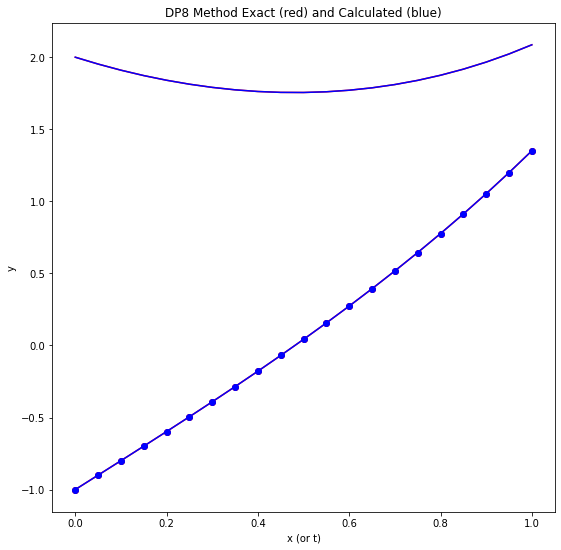

In [7]:
#plotting code adapated from NRPy "Solving the Scalar Wave Equation"
import matplotlib.pyplot as plt
# csv file interface from https://www.dataquest.io/blog/read-file-python/
import csv
import sys

#Make a bunch of lists to hold all our data. 
positionList = []
truthList0 = []
truthList1 = []
calculatedList0 = []
calculatedList1 = []
#This counter here helps us keep track of where we are. 
i = 0

# https://stackoverflow.com/questions/2753254/how-to-open-a-file-in-the-parent-directory-in-python-in-appengine
# to make sure we get the right file. 
with open('oSData.txt') as f: 
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        #Since we have alternating rows of data, we need to alternate our reading of it.
        if (i % 2 == 0):
            positionList.append(float(row[1]))
            calculatedList0.append(float(row[3]))
            calculatedList1.append(float(row[5]))
        else:
            truthList0.append(float(row[4]))
            truthList1.append(float(row[8]))
        i = i+1

#Next we plot it all using matplotlib. 
fig, ax = plt.subplots()
ax.set_xlabel('x (or t)')
ax.set_ylabel('y')
ax.set_title(key + ' Method Exact (red) and Calculated (blue)')
ax.plot(positionList, truthList0, color='r')
ax.plot(positionList, calculatedList0, color='b')
ax.plot(positionList, truthList1, color='r', marker = 'o')
ax.plot(positionList, calculatedList1, color='b', marker = 'o')

# https://stackoverflow.com/questions/332289/how-do-i-change-the-size-of-figures-drawn-with-matplotlib 
# setting size was annoying.
fig.set_size_inches(9,9)
fig.title = 'Title'

[5](#5) NRPy+ "Solving the Scalar Wave Equation"

[6](#6) https://www.dataquest.io/blog/read-file-python/

[7](#7) https://stackoverflow.com/questions/332289/how-do-i-change-the-size-of-figures-drawn-with-matplotlib

[9](#9) https://stackoverflow.com/questions/2753254/how-to-open-a-file-in-the-parent-directory-in-python-in-appengine

The line with cirlces is u', while the one without is u itself. If the Euler method was used, as was set by default, we should see some clear divergence by the end of the procedure: the values start out nearly the same between calculated and exact but slowly diverge. Orders that are much higher than that will produce essentially no discernable difference between the two graphs, everything will look blue. Which is not to say the result is perfect, merely that the difference is not discernable at this scale.

Therefore we usually don't try to compare data to truth this way, we instead look at the errors directly. 

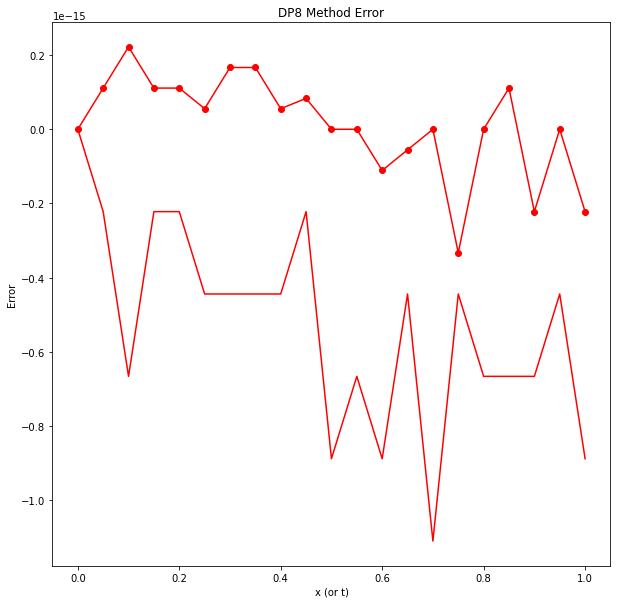

In [8]:
#plotting code adapated from NRPy "Solving the Scalar Wave Equation"
import matplotlib.pyplot as plt
# csv file interface from https://www.dataquest.io/blog/read-file-python/
import csv
import sys

#Make a bunch of lists to hold all our data. 
positionList = []
errorList0 = []
errorList1 = []
#This counter here helps us keep track of where we are. 
i = 0

# https://stackoverflow.com/questions/2753254/how-to-open-a-file-in-the-parent-directory-in-python-in-appengine
# to make sure we get the right file. 
with open('oSData.txt') as f: 
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        #Since we have alternating rows of data, we need to alternate our reading of it.
        if (i % 2 == 0):
            positionList.append(float(row[1]))
        else:
            errorList0.append(float(row[2]))
            errorList1.append(float(row[6]))
        i = i+1

fig, ax = plt.subplots()
ax.set_xlabel('x (or t)')
ax.set_ylabel('Error')
ax.set_title(key + ' Method Error')
ax.plot(positionList, errorList0, color='r')
ax.plot(positionList, errorList1, color='r', marker = 'o')
# https://stackoverflow.com/questions/332289/how-do-i-change-the-size-of-figures-drawn-with-matplotlib 
# setting size was annoying. 
fig.set_size_inches(10,10)

Admittedly, the above graph isn't particuarly illumiating in most cases, it genreally just shows that errors rise with time. The program reports error in an exact sense: it can be positive or negative and indicates precisely how far off from the truth the result was. Often, however, we care less about that and care more about the relative error, since that can be plotted on a logarithmic scale to tell us to how many significant figures our program matches the truth. 

In this case, we define relative error as:

$$ \left| \frac{Truth - Calculated}{Truth} \right| $$

The errorr reported by the program is just $Truth - Calculated$. But no worries, this is very simple to resolve, for numpy can take the arrays we made and do operations on them. Like so...

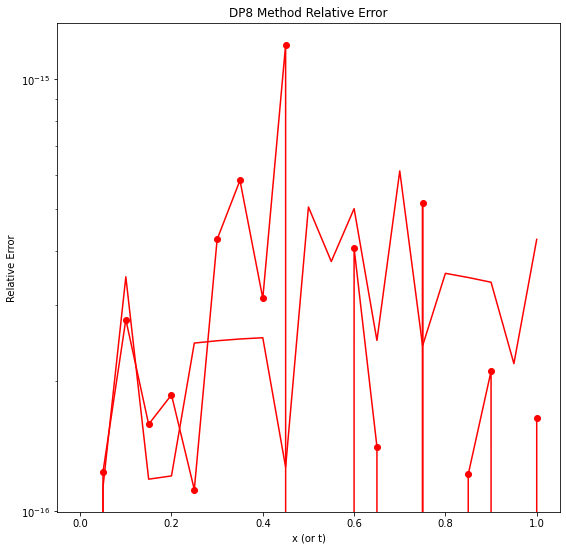

In [9]:
#plotting code adapated from NRPy "Solving the Scalar Wave Equation"
import matplotlib.pyplot as plt
# csv file interface from https://www.dataquest.io/blog/read-file-python/
import csv
import sys
import numpy as np #numpy, for doing math with our data. 

#Make a bunch of lists to hold all our data. 
positionList = []
errorList0 = []
errorList1 = []
truthList0 = []
truthList1 = []
#This counter here helps us keep track of where we are. 
i = 0

# https://stackoverflow.com/questions/2753254/how-to-open-a-file-in-the-parent-directory-in-python-in-appengine
# to make sure we get the right file. 
with open('oSData.txt') as f: 
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        #Since we have alternating rows of data, we need to alternate our reading of it.
        if (i % 2 == 0):
            positionList.append(float(row[1]))
        else:
            errorList0.append(float(row[2]))
            errorList1.append(float(row[6]))
            truthList0.append(float(row[4]))
            truthList1.append(float(row[8]))
        i = i+1

fig, ax = plt.subplots()
ax.set_xlabel('x (or t)')
ax.set_ylabel('Relative Error')
ax.set_title(key + ' Method Relative Error')
ax.plot(positionList, abs(np.array(errorList0)/np.array(truthList0)), color='r')
ax.plot(positionList, abs(np.array(errorList1)/np.array(truthList1)), color='r', marker = 'o')
# https://stackoverflow.com/questions/332289/how-do-i-change-the-size-of-figures-drawn-with-matplotlib 
# setting size was annoying. 
fig.set_size_inches(9,9)
ax.set_yscale("log") #found in matplotlib's documentation.

This tells us a lot more than the simple error plot! First of all, assuming the parameters have not been adjusted by the user, we can see clearly that the error starts at around 1e-3 and grows to 1e-2. Naturally this is not very good, less than 2 sig figs of agreement at the end, but this is Euler's method, we know it's not very good, we specifically chose it so we could visually see features on the full scale. 

One thing we do note is that the errors for the function u are well behaved and don't do anything unusual, slowly growing as is to be expected. However, the errors for u' spike in the middle! Why is this? Well, if we look at how u' itself behaves in the first graph, that is where it crosses the x axis--that is, u'=0 at some point. As the values get closer to zero, they get smaller and smaller, and thus the relative error between said values increases markedly. We could not see this feature in the direct error plot, but here it's on full display! Being aware of points where functions go to zero is an important part of analyzing them properly, and spikes like this in the error can be used to find them. 

These are generally the three graphs we make from one run of the program. However, there is more informaiton we can glean from running it multiple times. 

<a id='S3f'></a>

## Step 3f: Multiple-Run Examination \[Back to [top](#toc)\]
$$\label{S3f}$$

#### Sometimes doing it once just won't cut it.

Further validation of the program can be done if it's run multiple times. Since trying to do that from scratch in this notebook would just fill it with C-declarations, we will use data from previous runs of the system to construct the following graphs. What follows are runs performed with the exact same program as above, but the method was RK4. We did the evaluation with two different step sizes: 0.01, and 0.02 with SIZE of 100 and 50, repsectively. When plotted together, the results are:

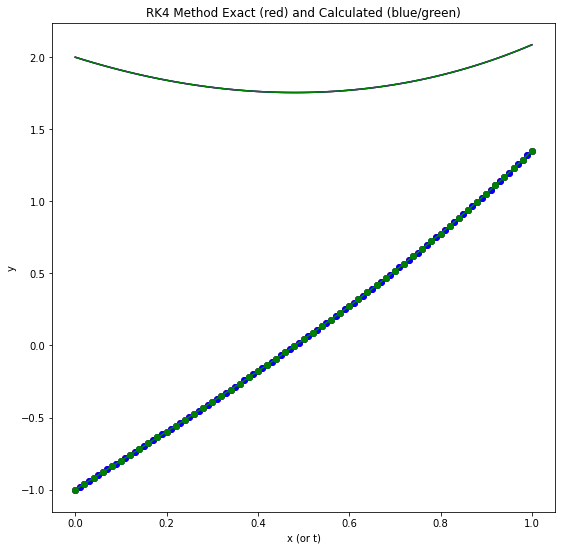

In [10]:
#plotting code adapated from NRPy "Solving the Scalar Wave Equation"
import matplotlib.pyplot as plt
# csv file interface from https://www.dataquest.io/blog/read-file-python/
import csv
import sys

#Make a bunch of lists to hold all our data. 
positionList = []
truthList0 = []
truthList1 = []
calculatedList0 = []
calculatedList1 = []

#"a" appended to the front of lists to be used for the second data set.
#truth list is irrelevant, the value is the same for both. 
apositionList = []
acalculatedList0 = []
acalculatedList1 = []
#This counter here helps us keep track of where we are. 
i = 0

# https://stackoverflow.com/questions/2753254/how-to-open-a-file-in-the-parent-directory-in-python-in-appengine
# to make sure we get the right file. 
with open(sys.path[0] + '/RKData01.txt') as f: #this file is stored in the folder, not produced at runtime.
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        #Since we have alternating rows of data, we need to alternate our reading of it.
        if (i % 2 == 0):
            positionList.append(float(row[1]))
            calculatedList0.append(float(row[3]))
            calculatedList1.append(float(row[5]))
        else:
            truthList0.append(float(row[4]))
            truthList1.append(float(row[8]))
        i = i+1
i = 0
with open(sys.path[0] + '/RKData02.txt') as f: #this file is stored in the folder, not produced at runtime.
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        #Since we have alternating rows of data, we need to alternate our reading of it.
        if (i % 2 == 0):
            apositionList.append(float(row[1]))
            acalculatedList0.append(float(row[3]))
            acalculatedList1.append(float(row[5]))
        i = i+1


#Next we plot it all using matplotlib. 
fig, ax = plt.subplots()
ax.set_xlabel('x (or t)')
ax.set_ylabel('y')
ax.set_title('RK4 Method Exact (red) and Calculated (blue/green)')
ax.plot(positionList, truthList0, color='r')
ax.plot(positionList, calculatedList0, color='b')
ax.plot(apositionList, acalculatedList0, color='g')
ax.plot(positionList, truthList1, color='r', marker = 'o')
ax.plot(positionList, calculatedList1, color='b', marker = 'o')
ax.plot(apositionList, acalculatedList1, color='g', marker = 'o')

# https://stackoverflow.com/questions/332289/how-do-i-change-the-size-of-figures-drawn-with-matplotlib 
# setting size was annoying.
fig.set_size_inches(9,9)
fig.title = 'Title'

Naturally, viewing it from the bird's eye view reveales absolutely nothing, as the truth, 0.01 step, and 0.02 step results are all essentially right on top of each other. We can tell that the resolution is different only because the dots use to mark u' values are not in the same locations along the line. We have to examine the log plot to get anything useful out of this. 

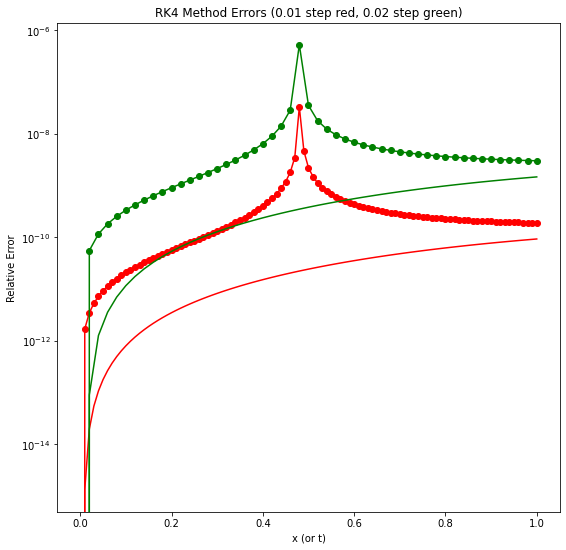

In [11]:
#plotting code adapated from NRPy "Solving the Scalar Wave Equation"
import matplotlib.pyplot as plt
# csv file interface from https://www.dataquest.io/blog/read-file-python/
import csv
import sys

#Make a bunch of lists to hold all our data. 
positionList = []
truthList0 = []
truthList1 = []
errorList0 = []
errorList1 = []

#"a" appended to the front of lists to be used for the second data set.
#truth list matters now as we need to be calculating relative errors.
apositionList = []
atruthList0 = []
atruthList1 = []
aerrorList0 = []
aerrorList1 = []
#This counter here helps us keep track of where we are. 
i = 0

# https://stackoverflow.com/questions/2753254/how-to-open-a-file-in-the-parent-directory-in-python-in-appengine
# to make sure we get the right file. 
with open(sys.path[0] + '/RKData01.txt') as f: #this file is stored in the folder, not produced at runtime.
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        #Since we have alternating rows of data, we need to alternate our reading of it.
        if (i % 2 == 0):
            positionList.append(float(row[1]))
        else:
            truthList0.append(float(row[4]))
            truthList1.append(float(row[8]))
            errorList0.append(float(row[2]))
            errorList1.append(float(row[6]))
        i = i+1
i = 0
with open(sys.path[0] + '/RKData02.txt') as f: #this file is stored in the folder, not produced at runtime.
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        #Since we have alternating rows of data, we need to alternate our reading of it.
        if (i % 2 == 0):
            apositionList.append(float(row[1]))
        else:
            atruthList0.append(float(row[4]))
            atruthList1.append(float(row[8]))
            aerrorList0.append(float(row[2]))
            aerrorList1.append(float(row[6]))
        i = i+1

#Next we plot it all using matplotlib. 
fig, ax = plt.subplots()
ax.set_xlabel('x (or t)')
ax.set_ylabel('Relative Error')
ax.set_title('RK4 Method Errors (0.01 step red, 0.02 step green)')
ax.plot(positionList, abs(np.array(errorList0)/np.array(truthList0)), color='r')
ax.plot(positionList, abs(np.array(errorList1)/np.array(truthList1)), color='r', marker = 'o')
ax.plot(apositionList, abs(np.array(aerrorList0)/np.array(atruthList0)), color='g')
ax.plot(apositionList, abs(np.array(aerrorList1)/np.array(atruthList1)), color='g', marker = 'o')

# https://stackoverflow.com/questions/332289/how-do-i-change-the-size-of-figures-drawn-with-matplotlib 
# setting size was annoying.
fig.set_size_inches(9,9)
fig.title = 'Title'
ax.set_yscale("log") #found in matplotlib's documentation.

We note the very curious result that while the errors are different in magnitude, their shape is virtually identical. The fact that 0.02 has more error than 0.01 is expected: smaller step size leads to higher resolution. But it almost looks as though there is a relaiton between the two errors. That is because there is a relation, that relation is based on the order of the error itself. Adjusting the step size by a factor of two should introduce an error difference of ariybd $2^m$, where m is the order of the error. in this case, m is 4, so we should see error adjustments by a factor of 16. Do we? 

The best way to test is just to plot it again, but scale one of the values by 16.

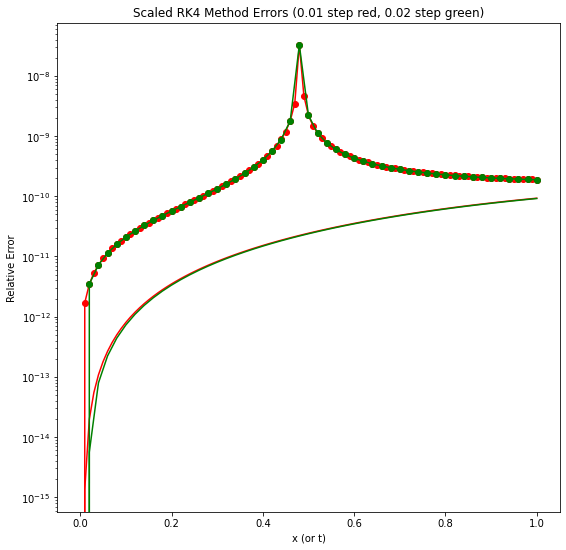

In [12]:
#plotting code adapated from NRPy "Solving the Scalar Wave Equation"
import matplotlib.pyplot as plt
# csv file interface from https://www.dataquest.io/blog/read-file-python/
import csv
import sys

#Make a bunch of lists to hold all our data. 
positionList = []
truthList0 = []
truthList1 = []
errorList0 = []
errorList1 = []

#"a" appended to the front of lists to be used for the second data set.
#truth list matters now as we need to be calculating relative errors.
apositionList = []
atruthList0 = []
atruthList1 = []
aerrorList0 = []
aerrorList1 = []
#This counter here helps us keep track of where we are. 
i = 0

# https://stackoverflow.com/questions/2753254/how-to-open-a-file-in-the-parent-directory-in-python-in-appengine
# to make sure we get the right file. 
with open(sys.path[0] + '/RKData01.txt') as f: #this file is stored in the folder, not produced at runtime.
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        #Since we have alternating rows of data, we need to alternate our reading of it.
        if (i % 2 == 0):
            positionList.append(float(row[1]))
        else:
            truthList0.append(float(row[4]))
            truthList1.append(float(row[8]))
            errorList0.append(float(row[2]))
            errorList1.append(float(row[6]))
        i = i+1
i = 0
with open(sys.path[0] + '/RKData02.txt') as f: #this file is stored in the folder, not produced at runtime.
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        #Since we have alternating rows of data, we need to alternate our reading of it.
        if (i % 2 == 0):
            apositionList.append(float(row[1]))
        else:
            atruthList0.append(float(row[4]))
            atruthList1.append(float(row[8]))
            aerrorList0.append(float(row[2]))
            aerrorList1.append(float(row[6]))
        i = i+1

#Next we plot it all using matplotlib. 
fig, ax = plt.subplots()
ax.set_xlabel('x (or t)')
ax.set_ylabel('Relative Error')
ax.set_title('Scaled RK4 Method Errors (0.01 step red, 0.02 step green)')
ax.plot(positionList, abs(np.array(errorList0)/np.array(truthList0)), color='r')
ax.plot(positionList, abs(np.array(errorList1)/np.array(truthList1)), color='r', marker = 'o')
ax.plot(apositionList, abs(np.array(aerrorList0)/np.array(atruthList0)/16.0), color='g')
ax.plot(apositionList, abs(np.array(aerrorList1)/np.array(atruthList1)/16.0), color='g', marker = 'o')

# https://stackoverflow.com/questions/332289/how-do-i-change-the-size-of-figures-drawn-with-matplotlib 
# setting size was annoying.
fig.set_size_inches(9,9)
fig.title = 'Title'
ax.set_yscale("log") #found in matplotlib's documentation.

The scaling factor of 16 has made it so the two error plots are more or less right on top of each other. They agree remarkably, even near the spike as u' approaches zero. 

This is effectively a validation check for the RK4 method itself--is it consistent with its supposed fourth-order accuracy? As we can see here, yes, absolutely. Everything matches. With that, we consider the Simple Example complete. We can now move on to a more complciated example, one where the truth is not known. 

<a id='S4'></a>

## Step 4: Complicated Problem Example \[Back to [top](#toc)\]
$$\label{S4}$$

#### Don't hang up yet, I'm not done.

The program is more than capable of handling questions that are far more complicated than a simple second-order differential equation. For instance, in General Relativity there are a sequence of equations called the TOV equations, the primary isntance of which is described on wikipedia [here](https://en.wikipedia.org/wiki/Tolman%E2%80%93Oppenheimer%E2%80%93Volkoff_equation). In genreal, the TOV equations represent a relativistic picture of a spherically symmetric star with respect to the radius. 

The specifics of why we wish to solve the TOV equations are unimportant, what is important is the form they take. There are many ways to state and evaluate them, but the one we will implement here is given by the following:

$$
\boxed{
\begin{matrix}
\frac{dP}{dr} &=& - \frac{1}{r} \left( \frac{\rho + P}{2} \right) \left(\frac{2 m}{r} + 8 \pi r^2 P\right) \left(1 - \frac{2 m}{r}\right)^{-1} \\
\frac{d \nu}{d r} &=& \frac{1}{r}\left(1 - \frac{2 m}{r}\right)^{-1} \left(\frac{2 m}{r} + 8 \pi r^2 P\right) \\
\frac{m(r)}{dr} &=& 4\pi r^2 \rho(r) \\
\frac{d\bar{r}(r)}{dr} &=& \left(1 - \frac{2m}{r} \right)^{-1/2} \frac{\bar{r}(r)}{r}
\end{matrix}
}\
$$

Taken from the soon-to-be-depricated [NRPy+ TOV solver](http://localhost:8889/notebooks/Tutorial-ADM_Initial_Data-TOV.ipynb). P is pressure, $\nu$ doesn't correlate to something easily seen as physica, m is the total enclosed mass of the star, and r-bar is the isotropic radius (non-normalized). Though, really, as an example the physical meaning of the results are unimportant. 

In various implementations and models, the function $\rho$ (energy density) can vary. In our implementation here, we treat it as

$$ \rho(r) = \sqrt{P} + P $$

Which we will report as a separate constant, making use of our program's functionality in this regard. For the record, a fuller definition of $\rho(r)$ would be...

$$ \rho(r) = (P/K)^{1/\Gamma} (1 + \frac{P}{(P/K)^{1/\Gamma} (\Gamma - 1)})$$

However, in our implementation K=1 and $\Gamma = 2$ so it quickly reduces to our original declaration. 

Another thing we need is initial conditions. The pressure has to be specified ahead of time, but all other values start at zero. In our case, Pressure is 0.016714611225000002. 

With all this, we have 4 differential equations and 1 constant we wish to report. We also need to consider our boundary conditions. Traditionally, we start from the center of the star at r=0. This, naturally, will provide some issues as the solver will run into divide by zero errors if it tries to evaluate any point there. However, in our declaration we will demonstrate how to avoid this issue, as well as avoiding problems that will arise if, say, the pressure goes negative due to an estimation error and makes the energy density NaN, which breaks everything. It can all be handled in the program so long as it is implemented properly. 

Note that unlike the Simple Problem, we do not know what the answer should be ahead of time, so there will be no relative error reporting this time around--but we will still have other forms of analysis. 

<a id='S4a'></a>

## Step 4a: Complicated Problem Customization  \[Back to [top](#toc)\]
$$\label{S4a}$$

#### Curiously not more complicated than the simple version of this section. 

Here is where users can adjust information in the notebook to adjust how the program runs. These changes only apply to the Complicated Example, the Simple Example and the final fully customizable code have their own customization sections. 

In [13]:
#This is the method variable, used to choose how the program calculates the result. 
key = "RK4"
#Possible options: "Euler" (Order 1), "RK2 Heun" (Order 2), "RK2 MP" (2), 
#"RK2 Ralston" (2), "RK3" (3), "RK3 Heun" (3), "RK3 Ralston" (3), "SSPRK3" (3),
#"RK4" (4), "DP5" (5), "DP5alt" (5), "CK5" (5), "DP6" (6), "L6" (6), "DP8" (8) 

#This is the step size. 
step = "0.00001"
#Can be any number, 0.00001 by default, because that's the first step the original NRPy+ TOV took.
#Note that this is a string--we are passing it to
#the C code generator as a string. Be very careful not to declare it as something that isn't
#a number. 

#This is the number of steps.
size = "100000"
#Can be any integer, 100000 by default. Be sure to make it actually be an integer. 
#Note that this time we have a termination condition, so we will not hit all the steps. 

#this is what we set to ask for validation. "true" if desired, "false" if not. Disabled for this example. 
validate = "false"

#This is the initial point we start from. Generally zero.
bound = "0.0"

#Unless you're adding another function or wish to report a constant, do not change the two settings below. 
#this is the number of equations in the system of differential equations
eNum = "4"
#make sure this is an integer.

#this is the number of constants we wish to report.
cNum = "1"
#make sure this is an integer.

#more coming eventually: functions and boundary values.
#though those two might be a while. 

<a id='S4b'></a>

## Step 4b: Complicated Problem Python-Code \[Back to [top](#toc)\]
$$\label{S4b}$$

#### The snakes complain that there's nothing different to do here. 

As with the simple example, we have to grab the Butcher Table and format it properly. The code here is absolutely identical to the previous example, it is simply replicated here for clarity. 

In [14]:
import sympy as sp              # SymPy: The Python computer algebra package upon which NRPy+ depends
import numpy as np              # NumPy: A numerical methods module for Python
from RK_Butcher_Table_Dictionary import Butcher_dict #the Butcher Tables themselves. 

#The end result of all this should be a string with our chosen method. 
#If you want to set the method, see above. 

butcherTable = ""

#Now in order to determine what size to make our loop, we need the size of the table itself.
print(len(Butcher_dict[key][0]))
rows = len(Butcher_dict[key][0])
#TABLE CONVERSION IN PROGRESS, PICK UP TOMORROW
maxColumns = len(Butcher_dict[key][0][rows-1]) #the last row has the max columns.
print(len(Butcher_dict[key][0][rows-1]))
i = 0

#Set up th edeclaration of the double 2D array in C. 
butcherTable = butcherTable + "double butcher[" + str(len(Butcher_dict[key][0])) + "][" + str(len(Butcher_dict[key][0][rows-1])) +"] = {"

while (i < rows):
    print(len(Butcher_dict[key][0][i]))
    #The above print function helps us see that the program really is doing the entire matrix.
    columns = len(Butcher_dict[key][0][i]) 
    
    butcherTable = butcherTable + "{"
    #Even though the matrix is square, we cannot set rows=columns since 
    #The butcher tables have a lot of empty slots we will be filling with 0s. 
    j = 0
    if Butcher_dict[key][0][i][j] == '':
        butcherTable = butcherTable + str(float(Butcher_dict[key][1]))+ ","
        j = j+1
        # This is a check for the empty spot in the bottom left of the table
        # the C-code uses this to store the method order, so we put it there. 
        # The main bennefit is that this keeps the matrix square.
    while (j < maxColumns): #not < columns, since we still need to fill in 0s for 
        #the C code. 
        if (j < columns):
            butcherTable = butcherTable + str(float(Butcher_dict[key][0][i][j]))
            # Print the number requested. 
            # Note the conversion to floating point. The C-code has no clue what to
            # do with fractions, so they must be changed. 
            if (j<maxColumns-1):
                butcherTable = butcherTable + ","
                #if not at end of row, add comma. WE don't want to overdo it. 
        elif (j < maxColumns-1):
            butcherTable = butcherTable + "0"+ ","
            # if we are at the point where there are no numbers, fill with 0. 
        else:
            butcherTable = butcherTable + "0"
            # if we are at the point where there are no numbers, fill with 0. 
            # end of row does not have the comma addition. 
        j = j+1
    if(i < rows-1):
        butcherTable = butcherTable + "},"
    else:
        butcherTable = butcherTable + "}"
    # After every row, we need a brace, but the added comma is not needed on the last one.
    i = i+1
butcherTable = butcherTable + "};"
print(butcherTable)

5
5
1
2
3
4
5
double butcher[5][5] = {{0.0,0,0,0,0},{0.5,0.5,0,0,0},{0.5,0.0,0.5,0,0},{1.0,0.0,0.0,1.0,0},{4.0,0.16666666666666666,0.3333333333333333,0.3333333333333333,0.16666666666666666}};


With that, now we can start setting up the file within which we will run the C code. Once again, we rely on NRPy+'s abilities to do this. 

In [15]:
import outputC as outC       #NRPy+: Core C code output module.
import cmdline_helper as cmd #NRPy+: Multi-platform Python command-line interface
import os                    #Python: Miscellaneous operating system interfaces
import shutil                #Python: High level file operations

# https://github.com/zachetienne/nrpytutorial/blob/master/Tutorial-Start_to_Finish-Finite_Difference_Playground.ipynb

#Create a C code output directory
#First, name it.
Ccodesrootdir = os.path.join(sys.path[0] + "/ODESolver_Complicated_Ccodes/")
#Remove any previously existing files there.
shutil.rmtree(Ccodesrootdir,ignore_errors=True)
#Create the fresh directory. 
cmd.mkdir(Ccodesrootdir)

<a id='S4c'></a>

## Step 4c: Complicated Problem C-Code \[Back to [top](#toc)\]
$$\label{S4c}$$

#### Time to make use of some real power.

Below is the C-Code. Numerous output lines are commented out and can be un-commented at will if a user wishes to examine in more detail what's happening during runtime. (Though in this notebook that is likely not necessary as the terminal output is just placed in a text file.) Code is heavily commented, some of it is likely redundant with the section above, but looking at things two different ways rarely hurts. 

The C-code generated here can also be found in pure C form, though it only has one of each of the first five orders of solution methods as possibilities, as it is unable to interface with NRPy+ directly. 

If a user wishes to examine the code in detail, we highly recommend opening the .c version in a coding editor with C in mind, since jupyter notebook is going to color all the C-Code red because we pass it through Python as a very large string. 

Yes, it is a very large block of text that is hard to read. We recommend looking for python comments marked with # to understand what exactly is being done. Unlike the Simple Example, here we will be using a lot of the extra functionality of the solver, but will not be reporting errors since this is a situation where we don't know what the truth is. 

In [16]:
#Now define our c function itself. To do that, we need to build the strings that actually make up the C-function. 
#when creating functions, NRPy+ takes several arguments, each one with its own important role:
#includes: this is where all the .h files that the C program relies on are declared, in the form of a list. 
#prefunc: any functions that exist outside of main() are declared here. For the purposes of this tutorial, we 
#explicitly declare these functions one at a time and go over them, but more often all of them are passed
#to prefunc as a long string all at once. 
#desc: contains a description of the method.
#c_type: what type does the main() function return? This is usually int. 
#name: what is the name of the main() function? Usually just main. 
#params: a place to put special parameters. Usually blank.
#body: the actual body of the main function and the majority of text density on any given document. 

#The most important part to go over is prefunc, for it is the part the user is expected to interact with.
#We consider its construction here step-by-step, one function at a time. 
#we use the format r""" """ to pass string literals so the C-code slashes don't mess up Python's compiler. 

aString = r"""
void diffyQEval (double x, double y[], double c[])
{
    //Efficient(ish) Assignment Method
    //This computes the values of the *derivatives* of the functions, so what we are passed
    //in the array y[] is *not* the same thing as what we are calculating, be careful not to re-use
    //outside of the function, because we are taking in the function itself and replacing it with its derivative. 
    //This is somewhat counter-intuitive, but it is efficient. 

    //This if statement is an example of a special condition, in this case at x=0 we have a divide by zero problem. 
    //In this case we manually know what the derivatives should be.
    //Alternatively, we could define piecewise equations this way. 
    if(x == 0) {
        y[0] = 0; 
        y[1] = 0;
        y[2] = 0;
        y[3] = 1;
    }
    else {
        double y0 = y[0]; //Pressure
        double y1 = y[1]; //nu. Uncertain what this physically is, likely just a bookkeeping situation. 
        double y2 = y[2]; //Total mass. 
        double y3 = y[3]; //r-bar, the isotropic radius. NOT NORMALIZED. Must be normalized in post-processing. 

        //Note that we declare these buffer variables since we will need to use them multiple times, but we are also
        //overwriting them in the original array, so we need buffers. 
        y[0] = -((c[0]+y0)*( (2.0*y2)/(x) + 8.0*M_PI*x*x*y0 ))/(x*2.0*(1.0 - (2.0*y2)/(x)));
        y[1] =  ((2.0*y2)/(x) + 8.0*M_PI*x*x*y0)/(x*(1.0 - (2.0*y2)/(x)));
        y[2] = 4*M_PI*x*x*c[0];
        y[3] = (y3)/(x*sqrt(1.0-(2.0*y2)/x));
    }
    //This funciton is not guaranteed to work in all cases. For instance, we have manually 
    //made an exception for x=0, since evaluating at 0 produces infinities and NaNs. 
    //Be sure to declare any exceptions before running, both here and in exceptionHandler(), depending 
    //on the kind of exception desired.  
}

"""

#The above function is where a user would declare the actual set of differential equations to be solved. 
#Here we have declared the TOV equations, all four of them. 
#Note that we have an if statement here. This is an example of careful declaration.

#The if statement catches when we're trying to evaluate a function at zero, which would go very badly
#aince most of the equations contain 1/r, which is going to break everything. Thus, when we evaluate
#at r=0 (or x=0 in the code), we replace the values with known ones. 
#The determination of these values was analytic in nature: pressure, nu, and mass all have to have
#a derivative of zero at r=0 since they are smooth functions and the star is spherically symmetric. 
#The isotropic radius is a little different, we assume here that it has a derivative of 1, that is, 
#it scales directly with the radius r itself at the start. This is just an assumption to get it to
#calculate. The produced result will be incorrect, but it will be *relatively* correct. The actual
#isotropic radius will be found by normalizing the data produced by this. We are allowed to do this since
#none of the other functions in the system depend on the isotropic radius. 

#Such an if statement could also be used to declare piecewise differential equations. 

#Note the nuance: we are being passed an array with values y, but we change it to contain values y', the derivatives.
#This is why we make sure to declare double variables when doing this, in case, say, the derivative of y1 depends
#On y0. These coupled reliances exist here, too; if we changed y2 and then tried to evaluate the y3', we would be incorrect. 
#Users can also declare piecewise functions here with a C if statement, should it be desired. 

aString = aString + r"""
void getInitialCondition (double y[])
{
    //be sure to have these MATCH the equations in diffyQEval
    y[0] = 0.016714611225000002; //Pressure
    y[1] = 0.0; //nu
    y[2] = 0.0; //mass
    y[3] = 0.0; //r-bar
}
"""

#We have added another function, the getInitialCondition function, which is used to stare initial conditions. 
#These are the initial conditions of the actual functions, not their derivatives. 
#When declaring new initial conditions, make sure they match the order of the differential equations in DiffyQEval()!
#The program assumes the values you insert here are correct, this will lead to problems if they are not. 
#The initial condition for the Pressure comes from the "central baryon density," via P = Krho_b^Gamma = rho_b^2. 
#The baryon density here was chosen to be 0.129285, taken from NRPy+'s TOV solver

aString = aString + r"""
void constEval (double y[], double c[])
{
    //Sometimes we want to evaluate constants in the equation that change, but do not have derivative forms.
    //Today, we do that for the total energy density. 
    double c0 = c[0];
    //Make sure to instantiate buffer values so you don't end up changing things when you don't want to!
    //Not necessary here, but left in as a demonstration. 
    c[0] = sqrt(y[0]) + y[0];
    //The total energy density only depends on pressure. 
}

"""

#Today we have a constant to evaluate, the total energy density. It depends entirely on y[0] (Pressure), however
#the program supports constants that depend on any number of the actual differential equation values. 

aString = aString + r"""
void knownQEval (double x, double y[])
{
    //This function is only used if there are known solutions. 
    //Notably this is not the case for the TOV equations. 
    //If you do put anything here, make SURE it has the same order as the differential equations. 
    //In the case of TOV, that would be Pressure, nu, mass, and r-bar, in that order. 
}

"""

#We do NOT know the solution to the TOV equations, so we leave this function empty save for some comments. 
#If we did have an exact result, it would need to be declared in the same order as the differential equations.

aString = aString + r"""
void exceptionHandler (double x, double y[], double c[])
{
    //This funciton might be empty. It's only used if the user wants to hard code some limitations 
    //On some varaibles.
    //Good for avoding some divide by zero errors, or going negative in a square root. 
    if (y[0] < 0) {
        y[0] = 0;
    }
    //In this case, the TOV Equations, we need to make sure the pressure doesn't go negative.
    //Physically, it cannot, but approximation methods can cross the P=0 line
    //We just need a hard wall to prevent that. 
}

"""

#This time, we do need an exception handler. In this case, we knot that the total energy density (rho)
#is determined by taking the square root of the pressure. If RK methods were perfect, there would
#be no problem here, since the only way this would be undefined is if Pressure went negative. Physically,
#this is impossible. However, RK methods are not perfect and when evaluating values near 0, they can
#easily throw out small values just below zero. This will break everything when the program tries
#to take a square root. So, if we ever detect that pressure has dropped below zero, we set it *to* zero
#to prevent this from occuring. 

#If a user is getting a lot of NaN and inf results, chances are the program is trying to evaluate something
#like a negative square root. The exception handler can also be used to force boundaries on the way the data
#evolves, such as modeling a "wall" by preventing a value from increasing beyond a certain point. 

aString = aString + r"""
int doWeTerminate (double x, double y[], double c[])
{
    //This funciton might be empty. It's only used if the user wants to have a special termination condition.
    //Today we do. We terminate once the pressure hits zero, or goes below it. 
    if (y[0] <= 0.0) {
        return 1;
    } else {
        return 0;
    }
    //return 1 for termination.
}

"""

#We also have a termination condition. Once the pressure drops to zero, we know we have reached the
#edge of the star and don't particuarly care what exists outside of it. 

def add_to_Cfunction_dict_ODESolver():
    includes = ["stdio.h", "stdlib.h", "math.h", "stdbool.h", "time.h"]
    # what "#include" lines do we include at the top?
    
    prefunc = aString
    #prefunctions are functions declared outside main.
    #the specifics of what go here were declared above. 
    
    desc = "Complicated Example: TOV Solver With Basic Assumptions."
    #just put a guide as to what the code actually does here. 
    
    c_type = "int" 
    #what does main return?
    
    name = "main"
    #will almost always just be "main", but could be otherwise. 
    
    params = ""
    #various paremeters. Should be "" most often. 
    
    #Below is where the actual main function itself goes, constructed from the variables
    #defined in the customization section.
    #Anything that isn't red indicates where we are inserting something, such as the butcherTable or step size. 
    body = butcherTable + r"""
    printf("Beginning ODE Solver \"Odie\" V7...\n");
    
    //SECTION I: Preliminaries
    //Before the program actually starts, variables need to be created
    //and set, as well as the functions chosen. 
    //The system of differential equations can be found declared in diffyQEval().

    double step = """ + step + r"""; //the "step" value.
    double bound = """ + bound + r"""; //where the boundary/initial condition is. Same for every equation in the system.
    int numberOfEquations = """ + eNum + r"""; //How many equations are in our system?
    int numberOfConstants = """ + cNum + r"""; //How many constants do we wish to separately evaluate and report? 
    //If altering the two "numberOf" ints, be careful it doesn't go over the actual number and cause an overflow 
    //in the functions above main()
    const int SIZE = """ + size + r"""; //How many steps we are going to take?
    bool validate = """ + validate + r"""; //Set to true if you wish to run a validation test. Only works if solution is already known.
    //Spits out nonsense if no solution is provided.
    //BE WARNED: setting validate to true makes it print out all error data on a second line, the file will have
    //to be read differently.

        //How to get array size: https://stackoverflow.com/questions/37538/how-do-i-determine-the-size-of-my-array-in-c
    size_t methodSize = sizeof(butcher)/sizeof(butcher[0][0]);
    int dimension = sqrt((int)methodSize);
    //We need to know how big our method is, especially if passed one we've never seen before. 
    if (validate == true) {
        printf("Method Order: %i. \nOrder of Error should be near to or larger than Method Order + 1.\n",(int)butcher[dimension-1][0]);
        printf("If not, try a larger step size, roundoff error may be interfering.\n");
    } else {
        printf("Method Order: %i.\n",(int)butcher[dimension-1][0]);
    }
    //If validation is not needed, we don't care about the Order of the Error. 

    double y[numberOfEquations];
    double c[numberOfConstants];
    //These variables temporarily store the values calculated before they are 
    //printed to the output file and forgotten.
    //y is the values of the actual equations. 
    //c is just used to hold any constants we wish to report. 
    //Each array only holds values at one evaluation point, but one for each Equation.

    //This here sets the initial conditions as declared in getInitialCondition()
    getInitialCondition(y); 

    //This evaluates any constants that might be needed for evaluating the actual differnetial equations. 
    constEval(y,c);

    //SECTION II: The Loop

    //prior to beginning the loop, start the timer. 
    double startN = time(NULL);
    //printf("Time: %.90f seconds\n", startN);
    //set start time to current time.  Uncomment to print.

    //also open the file we'll be writing data to. 
    FILE *fp;
    fp = fopen("oCData.txt","w");

    //First though, let's print out our initial data. The print function needs to be adaptable to any size of data. 
    //We can do this with multiple print functions and just not adding the newline character until we're done.
    //We print both to console and to the file for the initial conditions, but later only print to file.
    //First, print the location we are at. 
    printf("INITIAL: Position:,\t%f,\t",bound);
    fprintf(fp, "Position:,\t%f,\t",bound);
    //Second, go through and print the result for every single equation in our system.
    for (int n = 0; n < numberOfEquations; n++) {
        printf("Equation %i:,\t%10.9e,\t",n, y[n]);
        fprintf(fp, "Equation %i:,\t%10.9e,\t",n, y[n]);
    }
    //Third, print out desired constants.     
    for (int n = 0; n < numberOfConstants; n++) {
        printf("Constant %i:,\t%10.9e,\t",n, c[n]);
        fprintf(fp, "Constant %i:,\t%10.9e,\t",n, c[n]);
    }
    //Lastly, the newline character. 
    printf("\n");
    fprintf(fp,"\n");
    //Comma delimiters are printed to the file so it can be converted to .csv with ease. 

    if (validate == true) {
        //In order to keep things neat and regular in the file, print a first line of errors. 
        //Even though by necessity all of them must be zero. 
        fprintf(fp, "Errors:,\t");
            for (int n = 0; n < numberOfEquations; n++) {
                fprintf(fp, "Equation %i:,\t0.0,\t",n);
                fprintf(fp, "Truth:,\t%10.9e,\t",y[n]);
            }
            for (int n = 0; n < numberOfConstants; n++) {
                fprintf(fp, "Constant %i:,\t0.0,\t",n);
                fprintf(fp, "Truth:,\t%10.9e,\t",c[n]);
            }   
            //printf("\n");
            fprintf(fp,"\n");
    }
    
    //This loop fills out all the data.
    //It takes a provided butcher table and executes the method stored within. Any table should work. 

    for (int i = 0; i < SIZE; i++){ 
        //i represents how many steps have been taken. 0 is the initial condition, that is, the variable `bound`. 
        double K[dimension][numberOfEquations];
        //These are the K-values that are required to evaluate RK-like methods. 
        //They will be determined based on the provided butcher table.
        //This is a 2D matrix since each diffyQ has its own set of K-values. 

        //Since we'll be calling K while it's empty, even though there should be no errors due
        //to the way it's set up, let's go ahead and fill it with zeroes.
        for (int j = 0; j<dimension; j++) {
            for (int n = 0; n<numberOfEquations; n++) {
                K[j][n]=0.0;
            }
        } 

        double yInsert[numberOfEquations];
        //We also need an array for the inserted y-values for each equation. 
        //Most applications actually have the different yInsert values be independent, so 
        //if we knew the form of the equation we could simplify the code.
        //However, we need to make sure to always fill everything in case we have a system
        //of the form y'=f(u,y) u'=g(u,y)

        double cInsert[numberOfConstants];
        //Create an array to hold the constants we want.
        //Surprisingly, does not throw an error when the number is zero. Neat.

        for (int j = 1; j < dimension; j++) {
            //Due to the way the Butcher Table is formatted, start our index at 1 and stop at the end. 
            double xInsert = bound+i*step + butcher[j-1][0]*step;
            //x does not change much for different tables, just adjust the "step correction" term.
            //x is the same for every equation too.

            for (int n = 0; n < numberOfEquations; n++) {
                yInsert[n] = y[n];
            } 
            //This is set since y is our actual value, but we will be adjusting yInsert a lot to find the next y. 

            for (int n = 1; n < dimension; n++) {
                //Once again, start at index of 1 rather than 0.
                for (int q = 0; q < numberOfEquations; q++) {
                    yInsert[q] = yInsert[q] + butcher[j-1][n]*K[n][q];
                }
                //Each individual yInsert portion is dependent on one of the K values.
                //K values are initially set to zero even though technically whenever 
                //we would use an undeclared K-value the butcher table would have zero.
                //You know, just in case something goes wrong. 
            }
            
            //Check for any limitations on our results. 
            exceptionHandler(xInsert,yInsert,cInsert);

            //Evaluate the constants. 
            constEval(yInsert,cInsert);

            //Now we actually evaluate the differential equations. 
            diffyQEval(xInsert, yInsert, cInsert);
            //yInsert comes out as evaluated derivatives, and is now in a form we can use. 

            for (int n = 0; n < numberOfEquations; n++) {
                K[j][n] = step*yInsert[n];
                //Fill in the K-values. 
            } 
        }

        //Now that we have all the K-values set, we need to find the actual result in one final loop.
        for (int n = 0; n< numberOfEquations; n++) {
            K[0][n] = y[n]; //The 0th spot in the K-values is reserved for holding the 
            //final value while it's being calculated. 
            for (int j = 1; j < dimension; j++) {
                K[0][n] = K[0][n] + butcher[dimension-1][j]*K[j][n]; 
                //This is where the actual approximation is finally performed. 
            }
            if (validate == true) {
                yInsert[n] = y[n];
                //Before we change our initial ys, we save their data for the validation check now that
                //yInsert is not being used. 
            }
            y[n] = K[0][n]; //Set y to the new estimated value. 
        }

        //After each step is calculated, print results. 
        //However, prior to printing we need to run our exception and constant evaluators one more time. 
        exceptionHandler(bound+i*step,y,c);
        constEval(y,c);
        //Since we've usually been running them on yInsert, the actual y and c values have not generally seen 
        //the restrictions applied here. 

        //Uncomment for live updates.
        //printf(fp, "Position:,\t%f,\t",bound+(i+1)*step);
        fprintf(fp, "Position:,\t%f,\t",bound+(i+1)*step);
        for (int n = 0; n < numberOfEquations; n++) {
            //printf("Equation %i:,\t%10.9e,\t",n, y1[n]);
            fprintf(fp, "Equation %i:,\t%10.9e,\t",n, y[n]);
        }
        for (int n = 0; n < numberOfConstants; n++) {
            //printf("Constant %i:,\t%10.9e,\t",n, c[n]);
            fprintf(fp, "Constant %i:,\t%10.9e,\t",n, c[n]);
        }   
        //printf("\n");
        fprintf(fp,"\n");
                
        //validation: grab the first error for every equation, estimate its order, and continually report errors
        if (validate==true) {
            //We should only be here if we have a truth to compare against. 
            double saveErr1[numberOfEquations];
            double yTruth[numberOfEquations];
            double constErr1[numberOfConstants];
            double cTruth[numberOfConstants];
            //we need errors for both the differential equations and the constants. 
            //We only need one error array for reporting errors, but we will need a second for order checking. 
            exceptionHandler(bound+step*(i+1),yTruth,cTruth);
            knownQEval(bound+step*(i+1),yTruth);
            constEval(yTruth,cTruth);
            //Evaluate what yTruth is at our current point.
            //remember, i+1, not i, since we've already updated the previous point. 

            for (int n = 0; n < numberOfEquations; n++) {
                saveErr1[n] = (yTruth[n] - y[n]);
                //This calculates the errors we have right now. 
            } 
            for (int n = 0; n < numberOfConstants; n++) {
                constErr1[n] = (cTruth[n] - c[n]);
                //This calculates the constant errors we have right now. 
            } 

            if(i == 0.0) { 
                //The following is an algorithm for determining the rate of error 
                //convergence. A bit rudimentary, could be condensed, but is also only
                //called once so not relaly a concern and it is easier to read this way. 
                //Note that this only reports the estimated order for the differential equations, not constants. 
                double saveErr2[numberOfEquations];
                //Need to store a second error. 
                double step2 = step*0.5;
                //It is easier to just use another variable than multiply the step by 0.5 every time. 
                //Below not really commented since it is just a copy of what's above with minor tweaks.
                    for (int j = 0; j<dimension; j++) {
                        for (int n = 0; n<numberOfEquations; n++) {
                            K[j][n]=0.0;
                        }
                    }

                    double yInsertBuffer[numberOfEquations];

                    for (int j = 1; j < dimension; j++) {
                        double xInsert = bound+i*step2 + butcher[j-1][0]*step2;
                        
                        for (int n = 0; n < numberOfEquations; n++) {
                            yInsertBuffer[n] = yInsert[n];
                        } 
                        for (int n = 1; n < dimension; n++) {
                            for (int q = 0; q < numberOfEquations; q++) {
                                yInsertBuffer[q] = yInsertBuffer[q] + butcher[j-1][n]*K[n][q];
                            }
                        }

                        exceptionHandler(xInsert,yInsertBuffer,cInsert);

                        constEval(yInsertBuffer,cInsert);

                        diffyQEval(xInsert, yInsertBuffer, cInsert);
                        for (int n = 0; n < numberOfEquations; n++) {
                            K[j][n] = step2*yInsertBuffer[n];
                        }

                    }
                    for (int n = 0; n< numberOfEquations; n++) {
                        K[0][n] = yInsert[n];
                        for (int j = 1; j < dimension; j++) {
                            K[0][n] = K[0][n] + butcher[dimension-1][j]*K[j][n];
                        }
                    }
                //Now that we've performed the approximation's first step at half the size, we can estimate the order.
                //Create an array to hold the true values. 
                double truthValidate[numberOfEquations];
                //Fill it with the true values. 
                knownQEval(bound+step2,truthValidate);
                //Then print out the estimated order, one individually for each equation.
                for (int n = 0; n < numberOfEquations; n++) {
                    saveErr2[n] = (truthValidate[n] - K[0][n]);
                    printf("Order of Error: %i\t%f\n",n, log2(saveErr1[n]/saveErr2[n]));
                }
                //Note: this will not produce an integer, but with proper data it will be close to an integer
                //and the validation would be performed by rounding. 
                //Results can be larger than the order of the method+1, but should not be much smaller
                //However one can also get errors if the results are too exact, roundoff error can ruin the calcluation. 
                //Using larger step sizes usually removes that. 
            }
        
            //When validating, we add an extra line to the output file for errors.
            //prints the errors alongside the truth values. 
            fprintf(fp, "Errors:,\t");
            for (int n = 0; n < numberOfEquations; n++) {
                fprintf(fp, "Equation %i:,\t%10.9e,\t",n, saveErr1[n]);
                fprintf(fp, "Truth:,\t%10.9e,\t",yTruth[n]);
            }
            for (int n = 0; n < numberOfConstants; n++) {
                fprintf(fp, "Constant %i:,\t%10.9e,\t",n, constErr1[n]);
                fprintf(fp, "Truth:,\t%10.9e,\t",cTruth[n]);
            }   
            //printf("\n");
            fprintf(fp,"\n");

            //Note that error printed is not relative error, but simple difference error. 
        }

        //And the very last thing we do in the loop is ask if we terminate it. 
        if (doWeTerminate(bound+i*step, y, c) == 1) {
            i = SIZE;
        }
    }

    //SECTION III: Analysis
    //Minor post-processing goes here. 
    //Anything advanced will need to be done in the jupyter notebook that encloses this. 

    // basic reference: https://www.tutorialspoint.com/cprogramming/c_file_io.htm
    // used to be a file converter here, now there isn't, we just close the file. 
    fclose(fp);

    //TIMER
    double endN = time(NULL);
    //loop is complete, how long did it take?
    printf("Time Elapsed: %f seconds\n", endN-startN);
    //Only calculates to the closest second, for some reason.

    printf("ODE Solver \"Odie\" V7 Shutting Down...\n");
    return 0;

// - GM, master of dogs.
    """
    #Now everything is ready to be constructed. 
    outC.add_to_Cfunction_dict(
    includes=includes,
    prefunc=prefunc,
    desc=desc,
    c_type=c_type, name=name, params=params,
    body=body, enableCparameters=False)
    #Now all those things we defined above are put into a function from outC, 
    #Which generates the actual entry in the C function dictionary. 
    
add_to_Cfunction_dict_ODESolver()
# Call the function we just declared above. 

cmd.new_C_compile(Ccodesrootdir, "ODESolver", compiler_opt_option="fast")
#This just compiles the code into the file ODESolver. 

os.chdir(Ccodesrootdir)
#Change the file path to the folder we created earlier. 

cmd.Execute("ODESolver", "", "terminalOutput.txt")
#Evaluate the C-code and put the Terminal output into a text file. 

(EXEC): Executing `make -j10`...
(BENCH): Finished executing in 0.23 seconds.
Finished compilation.
(EXEC): Executing `taskset -c 0,1,2,3 ./ODESolver `...
(BENCH): Finished executing in 0.40 seconds.


<a id='S4d'></a>

## Step 4d: Complicated Problem Results \[Back to [top](#toc)\]
$$\label{S4d}$$

#### If it isn't the consequences of my own actions. ...Again. 

First, let's see what the terminal printed. 

In [17]:
with open("terminalOutput.txt") as f:
    print(f.read())

Beginning ODE Solver "Odie" V7...
Method Order: 4.
INITIAL: Position:,	0.000000,	Equation 0:,	1.671461123e-02,	Equation 1:,	0.000000000e+00,	Equation 2:,	0.000000000e+00,	Equation 3:,	0.000000000e+00,	Constant 0:,	1.459996112e-01,	
Time Elapsed: 0.000000 seconds
ODE Solver "Odie" V7 Shutting Down...



Note that the method of error isn't even stated here, we did not ask for a validation check since we don't know the answer. Do note that we now report the constant as well! 

The actual data produced by the program is below. Note: if the user chose a large SIZE it will be a very long result. Though we have it set to 100 by default so it's going to be large anyway. 

In [18]:
with open("oCData.txt") as f:
    print(f.read())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Note that there are no errors reported, just the positions, values of our functions, and the value of our constant. This should be the full solution to the system of differential equations. 

<a id='S4e'></a>

## Step 4e: Complicated Problem Analysis \[Back to [top](#toc)\]
$$\label{S4e}$$

#### Time to go mining again. 

Let's just print out our equations and constant, see how they behave. 

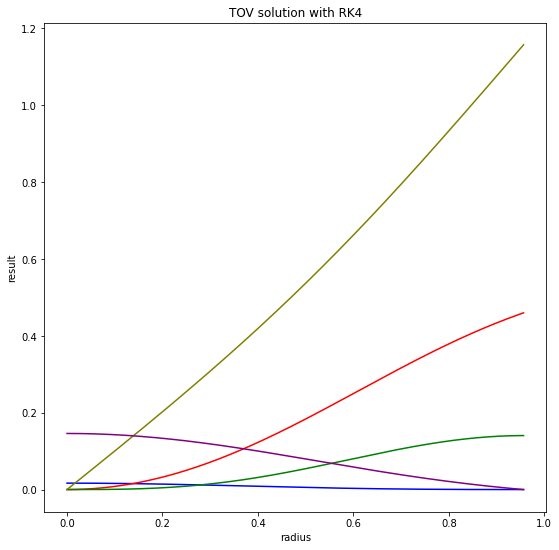

In [19]:
#plotting code adapated from NRPy "Solving the Scalar Wave Equation"
import matplotlib.pyplot as plt

positionList = []
calculatedList0 = []
calculatedList1 = []
calculatedList2 = []
calculatedList3 = []
calculatedList4 = []

# csv file interface from https://www.dataquest.io/blog/read-file-python/
import csv
import sys
# https://stackoverflow.com/questions/2753254/how-to-open-a-file-in-the-parent-directory-in-python-in-appengine
# to make sure we get the right file. 
with open('oCData.txt') as f: 
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        positionList.append(float(row[1]))
        calculatedList0.append(float(row[3]))
        calculatedList1.append(float(row[5]))
        calculatedList2.append(float(row[7]))
        calculatedList3.append(float(row[9]))
        calculatedList4.append(float(row[11]))

fig, ax = plt.subplots()
ax.set_xlabel('radius')
ax.set_ylabel('result')
ax.set_title('TOV solution with RK4')
ax.plot(positionList, calculatedList0, color='b') 
ax.plot(positionList, calculatedList1, color='r') 
ax.plot(positionList, calculatedList2, color='g') 
ax.plot(positionList, calculatedList3, color='olive') 
ax.plot(positionList, calculatedList4, color='purple') 

#plt.ylim(0.0,0.15)
#plt.xlim(0.0,1)
fig.set_size_inches(9,9)

Well, everything looks nice and smooth, but a lot of the information here is condensed at the bottom of the graph. Let's zoom in to examine the detail. 

(For the record, blue is pressure, red is nu, green is mass, gold is r-bar, and purple is total energy density) 

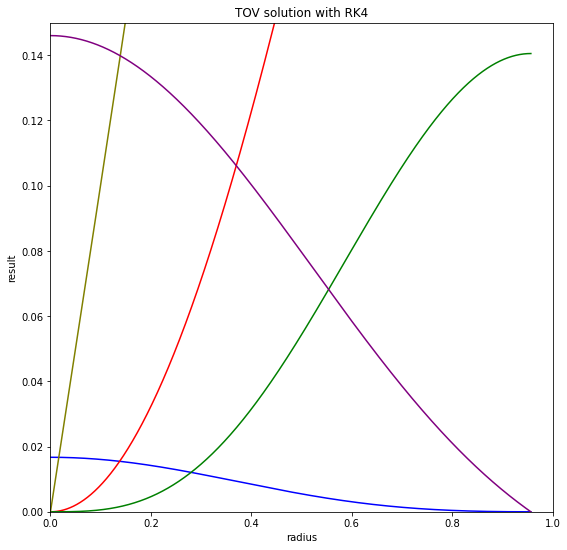

In [20]:
#plotting code adapated from NRPy "Solving the Scalar Wave Equation"
import matplotlib.pyplot as plt

positionList = []
calculatedList0 = []
calculatedList1 = []
calculatedList2 = []
calculatedList3 = []
calculatedList4 = []

# csv file interface from https://www.dataquest.io/blog/read-file-python/
import csv
import sys
# https://stackoverflow.com/questions/2753254/how-to-open-a-file-in-the-parent-directory-in-python-in-appengine
# to make sure we get the right file. 
with open('oCData.txt') as f: 
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        positionList.append(float(row[1]))
        calculatedList0.append(float(row[3]))
        calculatedList1.append(float(row[5]))
        calculatedList2.append(float(row[7]))
        calculatedList3.append(float(row[9]))
        calculatedList4.append(float(row[11]))

fig, ax = plt.subplots()
ax.set_xlabel('radius')
ax.set_ylabel('result')
ax.set_title('TOV solution with RK4')
ax.plot(positionList, calculatedList0, color='b') 
ax.plot(positionList, calculatedList1, color='r') 
ax.plot(positionList, calculatedList2, color='g') 
ax.plot(positionList, calculatedList3, color='olive') 
ax.plot(positionList, calculatedList4, color='purple') 

plt.ylim(0.0,0.15)
plt.xlim(0.0,1)
fig.set_size_inches(9,9)

From this, we can confirm that our termination condition is working: the number of steps would have taken us to r=1, but we stop slightly before that. We also don't have any NaNs. The density and pressure act as expected, starting high in the center of the star and going to zero, while the mass levels off to a certain value (since the mass would all be contained within the star, this makes sense). All we can say about r-bar is that it's increasing similarly but not exactly to r itself, which is expected. Now, we happen to know that r-bar needs to be normalized, but the solver doesn't do that--we'll show how to do post-processing at the end here. 

For now, we discuss validation. We don't have a closed form solution for the TOV equations, but we do have a solution printed out by a previous NPRy+ solver that solved TOV equations specifically. Let's compare our results shall we? 

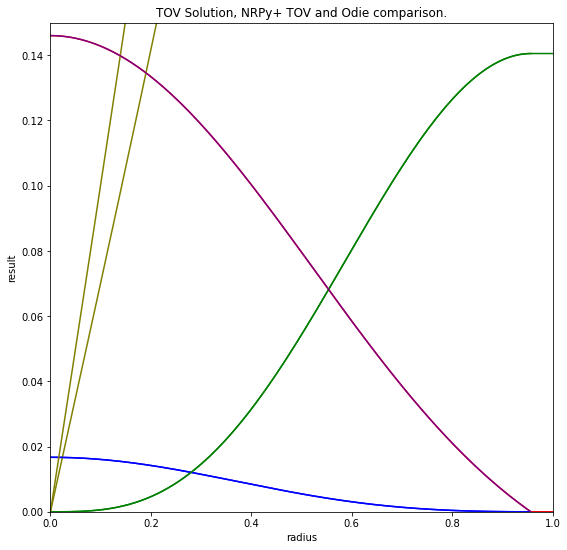

In [21]:
#plotting code adapated from NRPy "Solving the Scalar Wave Equation"
import matplotlib.pyplot as plt

positionList = []
calculatedList0 = []
calculatedList1 = []
calculatedList2 = []
calculatedList3 = []

# csv file interface from https://www.dataquest.io/blog/read-file-python/
import csv
import sys
# https://stackoverflow.com/questions/2753254/how-to-open-a-file-in-the-parent-directory-in-python-in-appengine
# to make sure we get the right file. 
with open(sys.path[0] + '/outputTOVpolytropeMedium.txt') as f: #data from NRPy+ TOV Solver
    reader = csv.reader(f, delimiter=' ')
    for row in reader:
        positionList.append(float(row[0]))
        calculatedList0.append(float(row[3]))
        calculatedList1.append(float(row[1]))
        calculatedList2.append(float(row[4]))
        calculatedList3.append(float(row[7]))

fig, ax = plt.subplots()
ax.set_xlabel('radius')
ax.set_ylabel('result')
ax.set_title('TOV Solution, NRPy+ TOV and Odie comparison.')

apositionList = []
acalculatedList0 = []
acalculatedList1 = []
acalculatedList2 = []
acalculatedList3 = []
acalculatedList4 = []

with open('oCData.txt') as f: 
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        apositionList.append(float(row[1]))
        acalculatedList0.append(float(row[3]))
        acalculatedList1.append(float(row[5]))
        acalculatedList2.append(float(row[7]))
        acalculatedList3.append(float(row[9]))
        acalculatedList4.append(float(row[11]))

ax.plot(positionList, calculatedList0, color='b') 
ax.plot(positionList, calculatedList1, color='r') 
ax.plot(positionList, calculatedList2, color='g') 
ax.plot(positionList, calculatedList3, color='olive') 

ax.plot(apositionList, acalculatedList0, color='b') 
ax.plot(apositionList, acalculatedList2, color='g') 
ax.plot(apositionList, acalculatedList3, color='olive') 
ax.plot(apositionList, acalculatedList4, color='purple') 

plt.ylim(0.0,0.15)
plt.xlim(0.0,1)
fig.set_size_inches(9,9)

We can see rather clearly that pressure, mass, and total energy density visually match the values reported by the trusted solver, with the notable exception that the solver continued evolving past P=0 and so we have some trailling flat lines at the end. However, r-bar does not match. This is because, as previously mentioned, we have not normalized the data. Normalization of r-bar requires knowing what the estimate for values at the edge of the star are, which can't be done until the entire differential equation is already solved, so this is why we do it now. The below code demonstrates how to use numpy to do this post-processing. 

Nu is not reported in this graph since the NRPy+ solver did not report it. 

The normalization factor for r-bar is

$$\frac{1}{2} \frac{\sqrt{R(R-2M) + R-M}}{\bar R}$$

Where R is the radius of the star, M is the mass, and $\bar R$ is the non-normalized isotropic radius of the star. These will be the *last* values in the lists of our data since we made sure to terminate at P=0.  

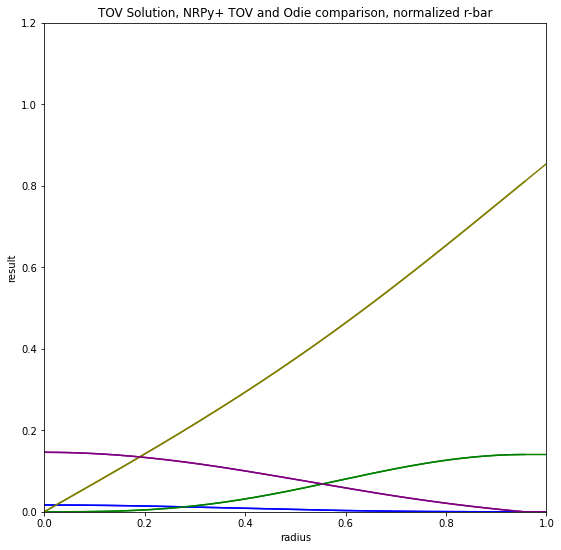

In [22]:
#plotting code adapated from NRPy "Solving the Scalar Wave Equation"
import matplotlib.pyplot as plt

positionList = []
calculatedList0 = []
calculatedList1 = []
calculatedList2 = []
calculatedList3 = []

# csv file interface from https://www.dataquest.io/blog/read-file-python/
import csv
import sys
# https://stackoverflow.com/questions/2753254/how-to-open-a-file-in-the-parent-directory-in-python-in-appengine
# to make sure we get the right file. 
with open(sys.path[0] + '/outputTOVpolytropeMedium.txt') as f: #data from NRPy+ TOV Solver
    reader = csv.reader(f, delimiter=' ')
    for row in reader:
        positionList.append(float(row[0]))
        calculatedList0.append(float(row[3]))
        calculatedList1.append(float(row[1]))
        calculatedList2.append(float(row[4]))
        calculatedList3.append(float(row[7]))

fig, ax = plt.subplots()
ax.set_xlabel('radius')
ax.set_ylabel('result')
ax.set_title('TOV Solution, NRPy+ TOV and Odie comparison, normalized r-bar')

apositionList = []
acalculatedList0 = []
acalculatedList1 = []
acalculatedList2 = []
acalculatedList3 = []
acalculatedList4 = []

with open('oCData.txt') as f: 
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        apositionList.append(float(row[1]))
        acalculatedList0.append(float(row[3]))
        acalculatedList1.append(float(row[5]))
        acalculatedList2.append(float(row[7]))
        acalculatedList3.append(float(row[9]))
        acalculatedList4.append(float(row[11]))

#POST PROCESSING!
#Now that we have all our data in lists, we can harvest the last values using Python's "-1" index trick.
R_Schw    = apositionList[-1]
M         = acalculatedList2[-1]
Rbar_Schw = acalculatedList3[-1]

#Calculate the normalization constant
C = 0.5*(np.sqrt(R_Schw*(R_Schw - 2.0*M)) + R_Schw - M) / Rbar_Schw
        
ax.plot(positionList, calculatedList0, color='b') 
ax.plot(positionList, calculatedList1, color='purple') 
ax.plot(positionList, calculatedList2, color='g') 
ax.plot(positionList, calculatedList3, color='olive') 

ax.plot(apositionList, acalculatedList0, color='b') 
ax.plot(apositionList, acalculatedList2, color='g') 
#Make sure to actually normalize r-bar when plotting it. numpy can perform operations on the list if
#we convert it to a numpy array. 
ax.plot(apositionList, np.array(acalculatedList3)*C, color='olive') 
ax.plot(apositionList, acalculatedList4, color='purple') 

plt.ylim(0.0,1.2)
plt.xlim(0.0,1)
fig.set_size_inches(9,9)

We zoomed out so we could focus on r-bar here. As we can see, now that it's normalized, both the trusted NRPy+ result and our program plot what is visually the same thing.

However, as we know, just because things are similar doesn't mean the errors are as small as we would like. Sadly, even though we have a trusted solution, it itself is just an approximation method and is not perfectly exact, so we can't determine "digits of agreement" with the truth since the truth isn't known to absolute precision. Furthermore, both solvers plot distinct points, and those points genreally don't line up so we can't easily compare them. 

There is a solution, however. It is a little messy, but we can use scypy's advanced interpolation functions to draw lines that connect the data poitns together so they can be compared. This is, admittedly, a second level of approximation being added to the data, but with luck it will show us that the two answers agree extremely closely. To do that, we will cubically interpolate the NRPy+ data so it can be evaluated at the same points our solver has results at, then we can compare those. 

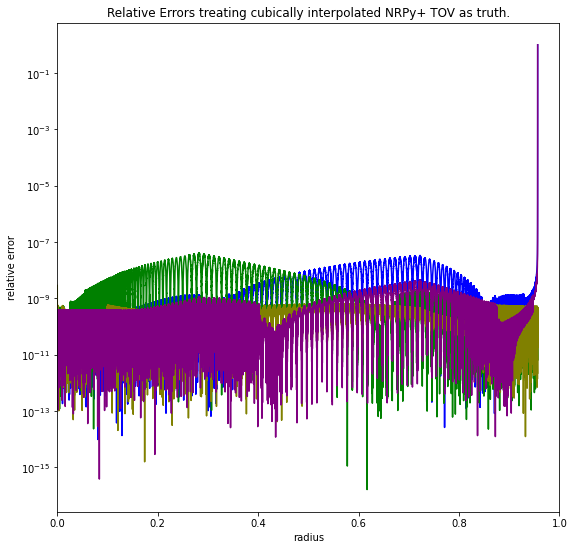

In [23]:
#plotting code adapated from NRPy "Solving the Scalar Wave Equation"
import matplotlib.pyplot as plt
import scipy.interpolate as scy
import numpy as np

positionList = []
calculatedList0 = []
calculatedList1 = []
calculatedList2 = []
calculatedList3 = []

# csv file interface from https://www.dataquest.io/blog/read-file-python/
import csv
import sys
# https://stackoverflow.com/questions/2753254/how-to-open-a-file-in-the-parent-directory-in-python-in-appengine
# to make sure we get the right file. 
with open(sys.path[0] + '/outputTOVpolytropeMedium.txt') as f: #data from NRPy+ TOV Solver
    reader = csv.reader(f, delimiter=' ')
    for row in reader:
        positionList.append(float(row[0]))
        calculatedList0.append(float(row[3]))
        calculatedList1.append(float(row[1]))
        calculatedList2.append(float(row[4]))
        calculatedList3.append(float(row[7]))

apositionList = []
acalculatedList0 = []
acalculatedList1 = []
acalculatedList2 = []
acalculatedList3 = []
acalculatedList4 = []

with open('oCData.txt') as f: 
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        apositionList.append(float(row[1]))
        acalculatedList0.append(float(row[3]))
        acalculatedList1.append(float(row[5]))
        acalculatedList2.append(float(row[7]))
        acalculatedList3.append(float(row[9]))
        acalculatedList4.append(float(row[11]))

fig, ax = plt.subplots()
ax.set_xlabel('radius')
ax.set_ylabel('relative error')
ax.set_title('Relative Errors treating cubically interpolated NRPy+ TOV as truth.')

R_Schw    = apositionList[-1]
M         = acalculatedList2[-1]
Rbar_Schw = acalculatedList3[-1]

C = 0.5*(np.sqrt(R_Schw*(R_Schw - 2.0*M)) + R_Schw - M) / Rbar_Schw

interpList0 = scy.interp1d(positionList, np.array(calculatedList0))
xNew = np.arange(0.63,0.8)
yNew = interpList0(np.arange(0.63,0.8))

#here is the interpolation. Admittedly not entirely sure how this all works, but here goes. 
from scipy import interpolate
x0 = np.array(positionList)
y0 = np.array(calculatedList0) #collect x and y values for the "truth" values. 
f0 = interpolate.interp1d(x0, y0, "cubic") #interpolate cubically between them. 
xnew = apositionList #Make the step size equal to our solver's.
xnew.pop(0)
ynew = f0(xnew)   # use interpolation function returned by `interp1d` to get "truth" values
ynew2 = acalculatedList0 #manually put our solver's values in, we wish to avoid double interpolating
ynew2.pop(0) #the first value, printed at r=0, is not reported in the NRPy+ solver, get rid of it. 
#1:20 + 45 = 2:05
plt.plot(xnew, abs((ynew-ynew2)/ynew), 'blue')

from scipy import interpolate
x2 = np.array(positionList)
y2 = np.array(calculatedList2)
f2 = interpolate.interp1d(x2, y2, "cubic")
ynew = f2(xnew)   # use interpolation function returned by `interp1d`
ynew2 = acalculatedList2
ynew2.pop(0) #the first value, printd at zero, is not reported in the NRPy+ solver, get rid of it.
plt.plot(xnew, abs((ynew-ynew2)/ynew), 'green')

from scipy import interpolate
x3 = np.array(positionList)
y3 = np.array(calculatedList3)
f3 = interpolate.interp1d(x3, y3, "cubic")
ynew = f3(xnew)   # use interpolation function returned by `interp1d`
ynew2 = acalculatedList3
ynew2.pop(0) #the first value, printd at zero, is not reported in the NRPy+ solver, get rid of it.
plt.plot(xnew, abs((ynew-np.array(ynew2)*C)/ynew), 'olive')

from scipy import interpolate
x4 = np.array(positionList)
y4 = np.array(calculatedList1)
f4 = interpolate.interp1d(x4, y4, "cubic")
ynew = f4(xnew)   # use interpolation function returned by `interp1d`
ynew2 = acalculatedList4
ynew2.pop(0) #the first value, printd at zero, is not reported in the NRPy+ solver, get rid of it
plt.plot(xnew, abs((ynew-ynew2)/ynew), 'purple')

# plt.ylim(0,0.001)
plt.xlim(0.0,1)
# https://stackoverflow.com/questions/332289/how-do-i-change-the-size-of-figures-drawn-with-matplotlib 
# setting size was annoying.
fig.set_size_inches(9,9)
ax.set_yscale("log") #found in matplotlib's documentation.

Well that is certainly an absolute mess. Let's run it again but zoom in so we can actually talk about what's going on. 

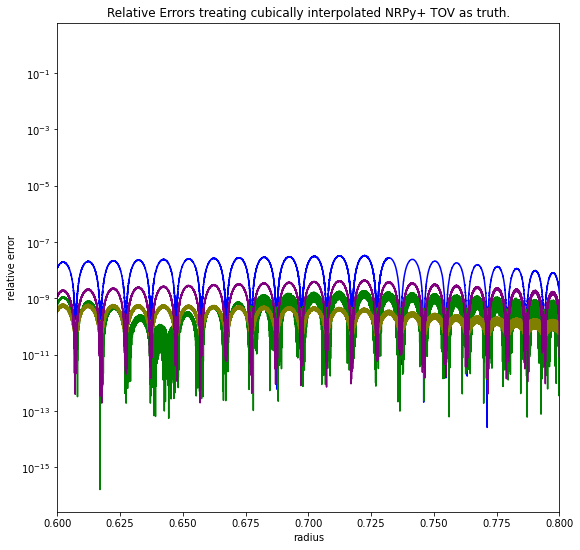

In [24]:
#plotting code adapated from NRPy "Solving the Scalar Wave Equation"
import matplotlib.pyplot as plt
import scipy.interpolate as scy
import numpy as np

positionList = []
calculatedList0 = []
calculatedList1 = []
calculatedList2 = []
calculatedList3 = []

# csv file interface from https://www.dataquest.io/blog/read-file-python/
import csv
import sys
# https://stackoverflow.com/questions/2753254/how-to-open-a-file-in-the-parent-directory-in-python-in-appengine
# to make sure we get the right file. 
with open(sys.path[0] + '/outputTOVpolytropeMedium.txt') as f: #data from NRPy+ TOV Solver
    reader = csv.reader(f, delimiter=' ')
    for row in reader:
        positionList.append(float(row[0]))
        calculatedList0.append(float(row[3]))
        calculatedList1.append(float(row[1]))
        calculatedList2.append(float(row[4]))
        calculatedList3.append(float(row[7]))

apositionList = []
acalculatedList0 = []
acalculatedList1 = []
acalculatedList2 = []
acalculatedList3 = []
acalculatedList4 = []

with open('oCData.txt') as f: 
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        apositionList.append(float(row[1]))
        acalculatedList0.append(float(row[3]))
        acalculatedList1.append(float(row[5]))
        acalculatedList2.append(float(row[7]))
        acalculatedList3.append(float(row[9]))
        acalculatedList4.append(float(row[11]))

fig, ax = plt.subplots()
ax.set_xlabel('radius')
ax.set_ylabel('relative error')
ax.set_title('Relative Errors treating cubically interpolated NRPy+ TOV as truth.')

R_Schw    = apositionList[-1]
M         = acalculatedList2[-1]
Rbar_Schw = acalculatedList3[-1]

C = 0.5*(np.sqrt(R_Schw*(R_Schw - 2.0*M)) + R_Schw - M) / Rbar_Schw

interpList0 = scy.interp1d(positionList, np.array(calculatedList0))
xNew = np.arange(0.63,0.8)
yNew = interpList0(np.arange(0.63,0.8))

#here is the interpolation. Admittedly not entirely sure how this all works, but here goes. 
from scipy import interpolate
x0 = np.array(positionList)
y0 = np.array(calculatedList0) #collect x and y values for the "truth" values. 
f0 = interpolate.interp1d(x0, y0, "cubic") #interpolate cubically between them. 
xnew = apositionList #Make the step size equal to our solver's.
xnew.pop(0)
ynew = f0(xnew)   # use interpolation function returned by `interp1d` to get "truth" values
ynew2 = acalculatedList0 #manually put our solver's values in, we wish to avoid double interpolating
ynew2.pop(0) #the first value, printed at r=0, is not reported in the NRPy+ solver, get rid of it. 
#1:20 + 45 = 2:05
plt.plot(xnew, abs((ynew-ynew2)/ynew), 'blue')

from scipy import interpolate
x2 = np.array(positionList)
y2 = np.array(calculatedList2)
f2 = interpolate.interp1d(x2, y2, "cubic")
ynew = f2(xnew)   # use interpolation function returned by `interp1d`
ynew2 = acalculatedList2
ynew2.pop(0) #the first value, printd at zero, is not reported in the NRPy+ solver, get rid of it.
plt.plot(xnew, abs((ynew-ynew2)/ynew), 'green')

from scipy import interpolate
x3 = np.array(positionList)
y3 = np.array(calculatedList3)
f3 = interpolate.interp1d(x3, y3, "cubic")
ynew = f3(xnew)   # use interpolation function returned by `interp1d`
ynew2 = acalculatedList3
ynew2.pop(0) #the first value, printd at zero, is not reported in the NRPy+ solver, get rid of it.
plt.plot(xnew, abs((ynew-np.array(ynew2)*C)/ynew), 'olive')

from scipy import interpolate
x4 = np.array(positionList)
y4 = np.array(calculatedList1)
f4 = interpolate.interp1d(x4, y4, "cubic")
ynew = f4(xnew)   # use interpolation function returned by `interp1d`
ynew2 = acalculatedList4
ynew2.pop(0) #the first value, printd at zero, is not reported in the NRPy+ solver, get rid of it
plt.plot(xnew, abs((ynew-ynew2)/ynew), 'purple')

# plt.ylim(0,0.001)
plt.xlim(0.6,0.8)
# https://stackoverflow.com/questions/332289/how-do-i-change-the-size-of-figures-drawn-with-matplotlib 
# setting size was annoying.
fig.set_size_inches(9,9)
ax.set_yscale("log") #found in matplotlib's documentation.

We see here a shape that regularly appears in error analysis: the COMB. 

The comb occurs when we have two sets of data that are reported at different resolutions but nonetheless represent the same quantity. As we can see, all four quantities we can compare demonstrate the comb effect. What's happening is that the NRPy+ TOV solver decided it didn't need to sample a lot of points in the middle of the star since it was behaving rather regularly, and so it takes steps of rougnly 0.01 in size, which we see here as the width of each segment of the comb. The points with the least error *are* the points NRPy+ TOV was reporting, which agree to 12 to 15 digits according to the exponent on the relative error. The "hump" errors are the errors of the cubic interpolation, which is not able to perfectly smooth out the data. However, even the places where the interpolator is the worst is still correct to 7 digits, barring the spike that occurs at the edge of the star due to some values drifting near to zero. 

Keep in mind this does not necessarily mean our program is "less accurate" than the NRPy+ TOV solver. In fact, since we take so many small steps, we are likely more accurate. All we can say is that we are extremely close to what the NRPy+ TOV solver thinks the answer is near the points where the NRPy+ TOV solver was actually evaluating, which means the disagreement between them is minimal. It is impossible to reduce the disagreement to absolutely zero, since we use different stepping methods and have a slightly different (more general) implementaiton. 

That, however, is all we have for our Complex Example. Hopefully we have demonstrated how to properly set it up so any user can now define their own set of differential equations and get whatever the desired results may be. 

<a id='S5'></a>

# Step 5: User-Defined Problem Section \[Back to [top](#toc)\]
$$\label{S5}$$


#### The part where I hand you the reigns.

With both examples behind us, this section is here simply for any user to edit. The above code does not take long to run, so it will have minimal effect on whatever is implemented below. 

<a id='S5a'></a>

## Step 5a: Customization \[Back to [top](#toc)\]
$$\label{S5a}$$

#### Wealth, fame, power, accuracy... all of it is on offer for the right combination of settings.

All the tools in the previous Examples are available here. 

In [25]:
#This is the method variable, used to choose how the program calculates the result. 
key = "Euler"
#Possible options: "Euler" (Order 1), "RK2 Heun" (Order 2), "RK2 MP" (2), 
#"RK2 Ralston" (2), "RK3" (3), "RK3 Heun" (3), "RK3 Ralston" (3), "SSPRK3" (3),
#"RK4" (4), "DP5" (5), "DP5alt" (5), "CK5" (5), "DP6" (6), "L6" (6), "DP8" (8) 

#This is the step size. 
step = "0.01"
#Can be any number, 0.01 by default.
#Note that this is a string--we are passing it to
#the C code generator as a string. Be very careful not to declare it as something that isn't
#a number. 

#This is the number of steps.
size = "100"
#Can be any integer, 100 by default. Be sure to make it actually be an integer.

#this is what we set to ask for validation. "true" if desired, "false" if not. Disabled by default. 
validate = "false"

#This is the initial point we start from. Generally zero.
bound = "0.0"

#this is the number of equations in the system of differential equations
eNum = "1"
#make sure this is an integer.

#this is the number of constants we wish to report.
cNum = "0"
#make sure this is an integer.

#more coming eventually: functions and boundary values.
#though those two might be a while. 

<a id='S5b'></a>

## Step 5b: Python-Code \[Back to [top](#toc)\]
$$\label{S5b}$$

#### Don't poke the snake too much. 

There's not really anything here to edit, we just need a new Python repository each time we do something. 

In [26]:
import sympy as sp              # SymPy: The Python computer algebra package upon which NRPy+ depends
import numpy as np              # NumPy: A numerical methods module for Python
from RK_Butcher_Table_Dictionary import Butcher_dict #the Butcher Tables themselves. 

#The end result of all this should be a string with our chosen method. 
#If you want to set the method, see above. 

butcherTable = ""

#Now in order to determine what size to make our loop, we need the size of the table itself.
print(len(Butcher_dict[key][0]))
rows = len(Butcher_dict[key][0])
#TABLE CONVERSION IN PROGRESS, PICK UP TOMORROW
maxColumns = len(Butcher_dict[key][0][rows-1]) #the last row has the max columns.
print(len(Butcher_dict[key][0][rows-1]))
i = 0

#Set up th edeclaration of the double 2D array in C. 
butcherTable = butcherTable + "double butcher[" + str(len(Butcher_dict[key][0])) + "][" + str(len(Butcher_dict[key][0][rows-1])) +"] = {"

while (i < rows):
    print(len(Butcher_dict[key][0][i]))
    #The above print function helps us see that the program really is doing the entire matrix.
    columns = len(Butcher_dict[key][0][i]) 
    
    butcherTable = butcherTable + "{"
    #Even though the matrix is square, we cannot set rows=columns since 
    #The butcher tables have a lot of empty slots we will be filling with 0s. 
    j = 0
    if Butcher_dict[key][0][i][j] == '':
        butcherTable = butcherTable + str(float(Butcher_dict[key][1]))+ ","
        j = j+1
        # This is a check for the empty spot in the bottom left of the table
        # the C-code uses this to store the method order, so we put it there. 
        # The main bennefit is that this keeps the matrix square.
    while (j < maxColumns): #not < columns, since we still need to fill in 0s for 
        #the C code. 
        if (j < columns):
            butcherTable = butcherTable + str(float(Butcher_dict[key][0][i][j]))
            # Print the number requested. 
            # Note the conversion to floating point. The C-code has no clue what to
            # do with fractions, so they must be changed. 
            if (j<maxColumns-1):
                butcherTable = butcherTable + ","
                #if not at end of row, add comma. WE don't want to overdo it. 
        elif (j < maxColumns-1):
            butcherTable = butcherTable + "0"+ ","
            # if we are at the point where there are no numbers, fill with 0. 
        else:
            butcherTable = butcherTable + "0"
            # if we are at the point where there are no numbers, fill with 0. 
            # end of row does not have the comma addition. 
        j = j+1
    if(i < rows-1):
        butcherTable = butcherTable + "},"
    else:
        butcherTable = butcherTable + "}"
    # After every row, we need a brace, but the added comma is not needed on the last one.
    i = i+1
butcherTable = butcherTable + "};"
print(butcherTable)

2
2
1
2
double butcher[2][2] = {{0.0,0},{1.0,1.0}};


<a id='S5c'></a>

## Step 5c: C-Code \[Back to [top](#toc)\]
$$\label{S5c}$$

#### Now it's time for some fun. 

Below is the C-Code. Numerous output lines are commented out and can be un-commented at will if a user wishes to examine in more detail what's happening during runtime. (Though in this notebook that is likely not necessary as the terminal output is just placed in a text file.) Code is heavily commented, some of it is likely redundant with the section above, but looking at things two different ways rarely hurts. 

The C-code generated here can also be found in pure C form, though it only has one of each of the first five orders of solution methods as possibilities. 

Everything has been set to the bare minimum to allow the code to run, most functions are empty, and the differential equation just solves y'=y by default. Users are encouraged to put anything desired in here. The Python comments should serve as a helpful guide. 

In [27]:
#Now define our c function itself. To do that, we need to build the strings that actually make up the C-function. 
#when creating functions, NRPy+ takes several arguments, each one with its own important role:
#includes: this is where all the .h files that the C program relies on are declared, in the form of a list. 
#prefunc: any functions that exist outside of main() are declared here. For the purposes of this tutorial, we 
#explicitly declare these functions one at a time and go over them, but more often all of them are passed
#to prefunc as a long string all at once. 
#desc: contains a description of the method.
#c_type: what type does the main() function return? This is usually int. 
#name: what is the name of the main() function? Usually just main. 
#params: a place to put special parameters. Usually blank.
#body: the actual body of the main function and the majority of text density on any given document. 

#The most important part to go over is prefunc, for it is the part the user is expected to interact with.
#We consider its construction here step-by-step, one function at a time. 
#we use the format r""" """ to pass string literals so the C-code slashes don't mess up Python's compiler. 

aString = r"""
void diffyQEval (double x, double y[], double c[])
{
    //Efficient(ish) Assignment Method

        double y0 = y[0];
        y[0] = y0;

    //This is the differential equation system itself. 
    //Naturally other equaitons can be put in, but be sure to change the numberOfEquations value!
    //Remember to declare a double y variable for each differential equation so no overwriting occurs. 
    //Note: not guaranteed to work for functions that are not well-behaved. 
}

"""

#The above function is where a user would declare the actual set of differential equations to be solved. 
#Note the nuance: we are being passed an array with values y, but we change it to contain values y', the derivatives.
#This is why we make sure to declare double variables when doing this, in case, say, the derivative of y1 depends
#On y0.
#Users can also declare piecewise functions here with a C if statement, should it be desired. 

aString = aString + r"""
void getInitialCondition (double y[])
{
    //be sure to have these MATCH the equations in diffyQEval
    //every differential equation needs one. 
    y[0] = 1.0;
}

"""

#We have added another function, the getInitialCondition function, which is used to stare initial conditions. 
#These are the initial conditions of the actual functions, not their derivatives. 
#When declaring new initial conditions, make sure they match the order of the differential equations in DiffyQEval()!
#The program assumes the values you insert here are correct, this will lead to problems if they are not. 
#Especially in error validation. 

aString = aString + r"""
void constEval (double y[], double c[])
{
    //none. 
}

"""

#This would be where we evaluate any additional constants we wish to report. 
#They should be declared like the equations in diffyQEval, though the order here is irrelevant
#we just need to ensure we don't overwrite any cs if there are more than one and they rely on each other. 

aString = aString + r"""
void knownQEval (double x, double y[])
{
    //not implemented by default.
}


"""

#Note that declared known values are the functions themselves, not their derivatives. 
#Also different boundary conditions would not necessarily produce the same results. 
#Even if the set values here are incorrect, the program can still calculate errors.
#The results would just all be junk. 

aString = aString + r"""
void exceptionHandler (double x, double y[], double c[])
{
    //This funciton might be empty. It's only used if the user wants to hard code some limitations 
    //On some varaibles.
    //Good for avoding divide by zero errors, or going negative in a square root. 
}

int doWeTerminate (double x, double y[], double c[])
{
    //This funciton might be empty. It's only used if the user wants to have a special termination condition.
    return 0;
    //return 1 for termination.
}
"""

#exceptionHandler() and doWeTerminate() are only used when special conditions are required. 
#esceptionHandler() can hold basically any code the user desires, such as checking if y[0] is negative and setting
#it to zero before passing it to diffyQEval. 
#doweTerminate() is intended to hold an if statement that returns 1 if a termination condition is reached. 
#Just have it return 0 if no termination aside from number of steps is desired. 

def add_to_Cfunction_dict_ODESolver():
    includes = ["stdio.h", "stdlib.h", "math.h", "stdbool.h", "time.h"]
    # what "#include" lines do we include at the top?
    
    prefunc = aString
    #prefunctions are functions declared outside main.
    #the specifics of what go here were declared above. 
    
    desc = "User-Defined Differential Equation(s)"
    #just put a guide as to what the code actually does here. 
    
    c_type = "int" 
    #what does main return?
    
    name = "main"
    #will almost always just be "main", but could be otherwise. 
    
    params = ""
    #various paremeters. Should be "" most often. 
    
    #Below is where the actual main function itself goes, constructed from the variables
    #defined in the customization section.
    #Anything that isn't red indicates where we are inserting something, such as the butcherTable or step size. 
    body = butcherTable + r"""
    printf("Beginning ODE Solver \"Odie\" V7...\n");
    
    //SECTION I: Preliminaries
    //Before the program actually starts, variables need to be created
    //and set, as well as the functions chosen. 
    //The system of differential equations can be found declared in diffyQEval().

    double step = """ + step + r"""; //the "step" value.
    double bound = """ + bound + r"""; //where the boundary/initial condition is. Same for every equation in the system.
    int numberOfEquations = """ + eNum + r"""; //How many equations are in our system?
    int numberOfConstants = """ + cNum + r"""; //How many constants do we wish to separately evaluate and report? 
    //If altering the two "numberOf" ints, be careful it doesn't go over the actual number and cause an overflow 
    //in the functions above main()
    const int SIZE = """ + size + r"""; //How many steps we are going to take?
    bool validate = """ + validate + r"""; //Set to true if you wish to run a validation test. Only works if solution is already known.
    //Spits out nonsense if no solution is provided.
    //BE WARNED: setting validate to true makes it print out all error data on a second line, the file will have
    //to be read differently.

        //How to get array size: https://stackoverflow.com/questions/37538/how-do-i-determine-the-size-of-my-array-in-c
    size_t methodSize = sizeof(butcher)/sizeof(butcher[0][0]);
    int dimension = sqrt((int)methodSize);
    //We need to know how big our method is, especially if passed one we've never seen before. 
    if (validate == true) {
        printf("Method Order: %i. \nOrder of Error should be near to or larger than Method Order + 1.\n",(int)butcher[dimension-1][0]);
        printf("If not, try a larger step size, roundoff error may be interfering.\n");
    } else {
        printf("Method Order: %i.\n",(int)butcher[dimension-1][0]);
    }
    //If validation is not needed, we don't care about the Order of the Error. 

    double y[numberOfEquations];
    double c[numberOfConstants];
    //These variables temporarily store the values calculated before they are 
    //printed to the output file and forgotten.
    //y is the values of the actual equations. 
    //c is just used to hold any constants we wish to report. 
    //Each array only holds values at one evaluation point, but one for each Equation.

    //This here sets the initial conditions as declared in getInitialCondition()
    getInitialCondition(y); 

    //This evaluates any constants that might be needed for evaluating the actual differnetial equations. 
    constEval(y,c);

    //SECTION II: The Loop

    //prior to beginning the loop, start the timer. 
    double startN = time(NULL);
    //printf("Time: %.90f seconds\n", startN);
    //set start time to current time.  Uncomment to print.

    //also open the file we'll be writing data to. 
    FILE *fp;
    fp = fopen("oData.txt","w");

    //First though, let's print out our initial data. The print function needs to be adaptable to any size of data. 
    //We can do this with multiple print functions and just not adding the newline character until we're done.
    //We print both to console and to the file for the initial conditions, but later only print to file.
    //First, print the location we are at. 
    printf("INITIAL: Position:,\t%f,\t",bound);
    fprintf(fp, "Position:,\t%f,\t",bound);
    //Second, go through and print the result for every single equation in our system.
    for (int n = 0; n < numberOfEquations; n++) {
        printf("Equation %i:,\t%10.9e,\t",n, y[n]);
        fprintf(fp, "Equation %i:,\t%10.9e,\t",n, y[n]);
    }
    //Third, print out desired constants.     
    for (int n = 0; n < numberOfConstants; n++) {
        printf("Constant %i:,\t%10.9e,\t",n, c[n]);
        fprintf(fp, "Constant %i:,\t%10.9e,\t",n, c[n]);
    }
    //Lastly, the newline character. 
    printf("\n");
    fprintf(fp,"\n");
    //Comma delimiters are printed to the file so it can be converted to .csv with ease. 

    if (validate == true) {
        //In order to keep things neat and regular in the file, print a first line of errors. 
        //Even though by necessity all of them must be zero. 
        fprintf(fp, "Errors:,\t");
            for (int n = 0; n < numberOfEquations; n++) {
                fprintf(fp, "Equation %i:,\t0.0,\t",n);
                fprintf(fp, "Truth:,\t%10.9e,\t",y[n]);
            }
            for (int n = 0; n < numberOfConstants; n++) {
                fprintf(fp, "Constant %i:,\t0.0,\t",n);
                fprintf(fp, "Truth:,\t%10.9e,\t",c[n]);
            }   
            //printf("\n");
            fprintf(fp,"\n");
    }
    
    //This loop fills out all the data.
    //It takes a provided butcher table and executes the method stored within. Any table should work. 

    for (int i = 0; i < SIZE; i++){ 
        //i represents how many steps have been taken. 0 is the initial condition, that is, the variable `bound`. 
        double K[dimension][numberOfEquations];
        //These are the K-values that are required to evaluate RK-like methods. 
        //They will be determined based on the provided butcher table.
        //This is a 2D matrix since each diffyQ has its own set of K-values. 

        //Since we'll be calling K while it's empty, even though there should be no errors due
        //to the way it's set up, let's go ahead and fill it with zeroes.
        for (int j = 0; j<dimension; j++) {
            for (int n = 0; n<numberOfEquations; n++) {
                K[j][n]=0.0;
            }
        } 

        double yInsert[numberOfEquations];
        //We also need an array for the inserted y-values for each equation. 
        //Most applications actually have the different yInsert values be independent, so 
        //if we knew the form of the equation we could simplify the code.
        //However, we need to make sure to always fill everything in case we have a system
        //of the form y'=f(u,y) u'=g(u,y)

        double cInsert[numberOfConstants];
        //Create an array to hold the constants we want.
        //Surprisingly, does not throw an error when the number is zero. Neat.

        for (int j = 1; j < dimension; j++) {
            //Due to the way the Butcher Table is formatted, start our index at 1 and stop at the end. 
            double xInsert = bound+i*step + butcher[j-1][0]*step;
            //x does not change much for different tables, just adjust the "step correction" term.
            //x is the same for every equation too.

            for (int n = 0; n < numberOfEquations; n++) {
                yInsert[n] = y[n];
            } 
            //This is set since y is our actual value, but we will be adjusting yInsert a lot to find the next y. 

            for (int n = 1; n < dimension; n++) {
                //Once again, start at index of 1 rather than 0.
                for (int q = 0; q < numberOfEquations; q++) {
                    yInsert[q] = yInsert[q] + butcher[j-1][n]*K[n][q];
                }
                //Each individual yInsert portion is dependent on one of the K values.
                //K values are initially set to zero even though technically whenever 
                //we would use an undeclared K-value the butcher table would have zero.
                //You know, just in case something goes wrong. 
            }
            
            //Check for any limitations on our results. 
            exceptionHandler(xInsert,yInsert,cInsert);

            //Evaluate the constants. 
            constEval(yInsert,cInsert);

            //Now we actually evaluate the differential equations. 
            diffyQEval(xInsert, yInsert, cInsert);
            //yInsert comes out as evaluated derivatives, and is now in a form we can use. 

            for (int n = 0; n < numberOfEquations; n++) {
                K[j][n] = step*yInsert[n];
                //Fill in the K-values. 
            } 
        }

        //Now that we have all the K-values set, we need to find the actual result in one final loop.
        for (int n = 0; n< numberOfEquations; n++) {
            K[0][n] = y[n]; //The 0th spot in the K-values is reserved for holding the 
            //final value while it's being calculated. 
            for (int j = 1; j < dimension; j++) {
                K[0][n] = K[0][n] + butcher[dimension-1][j]*K[j][n]; 
                //This is where the actual approximation is finally performed. 
            }
            if (validate == true) {
                yInsert[n] = y[n];
                //Before we change our initial ys, we save their data for the validation check now that
                //yInsert is not being used. 
            }
            y[n] = K[0][n]; //Set y to the new estimated value. 
        }

        //After each step is calculated, print results. 
        //However, prior to printing we need to run our exception and constant evaluators one more time. 
        exceptionHandler(bound+i*step,y,c);
        constEval(y,c);
        //Since we've usually been running them on yInsert, the actual y and c values have not generally seen 
        //the restrictions applied here. 

        //Uncomment for live updates.
        //printf(fp, "Position:,\t%f,\t",bound+(i+1)*step);
        fprintf(fp, "Position:,\t%f,\t",bound+(i+1)*step);
        for (int n = 0; n < numberOfEquations; n++) {
            //printf("Equation %i:,\t%10.9e,\t",n, y1[n]);
            fprintf(fp, "Equation %i:,\t%10.9e,\t",n, y[n]);
        }
        for (int n = 0; n < numberOfConstants; n++) {
            //printf("Constant %i:,\t%10.9e,\t",n, c[n]);
            fprintf(fp, "Constant %i:,\t%10.9e,\t",n, c[n]);
        }   
        //printf("\n");
        fprintf(fp,"\n");
                
        //validation: grab the first error for every equation, estimate its order, and continually report errors
        if (validate==true) {
            //We should only be here if we have a truth to compare against. 
            double saveErr1[numberOfEquations];
            double yTruth[numberOfEquations];
            double constErr1[numberOfConstants];
            double cTruth[numberOfConstants];
            //we need errors for both the differential equations and the constants. 
            //We only need one error array for reporting errors, but we will need a second for order checking. 
            exceptionHandler(bound+step*(i+1),yTruth,cTruth);
            knownQEval(bound+step*(i+1),yTruth);
            constEval(yTruth,cTruth);
            //Evaluate what yTruth is at our current point.
            //remember, i+1, not i, since we've already updated the previous point. 

            for (int n = 0; n < numberOfEquations; n++) {
                saveErr1[n] = (yTruth[n] - y[n]);
                //This calculates the errors we have right now. 
            } 
            for (int n = 0; n < numberOfConstants; n++) {
                constErr1[n] = (cTruth[n] - c[n]);
                //This calculates the constant errors we have right now. 
            } 

            if(i == 0.0) { 
                //The following is an algorithm for determining the rate of error 
                //convergence. A bit rudimentary, could be condensed, but is also only
                //called once so not relaly a concern and it is easier to read this way. 
                //Note that this only reports the estimated order for the differential equations, not constants. 
                double saveErr2[numberOfEquations];
                //Need to store a second error. 
                double step2 = step*0.5;
                //It is easier to just use another variable than multiply the step by 0.5 every time. 
                //Below not really commented since it is just a copy of what's above with minor tweaks.
                    for (int j = 0; j<dimension; j++) {
                        for (int n = 0; n<numberOfEquations; n++) {
                            K[j][n]=0.0;
                        }
                    }

                    double yInsertBuffer[numberOfEquations];

                    for (int j = 1; j < dimension; j++) {
                        double xInsert = bound+i*step2 + butcher[j-1][0]*step2;
                        
                        for (int n = 0; n < numberOfEquations; n++) {
                            yInsertBuffer[n] = yInsert[n];
                        } 
                        for (int n = 1; n < dimension; n++) {
                            for (int q = 0; q < numberOfEquations; q++) {
                                yInsertBuffer[q] = yInsertBuffer[q] + butcher[j-1][n]*K[n][q];
                            }
                        }

                        exceptionHandler(xInsert,yInsertBuffer,cInsert);

                        constEval(yInsertBuffer,cInsert);

                        diffyQEval(xInsert, yInsertBuffer, cInsert);
                        for (int n = 0; n < numberOfEquations; n++) {
                            K[j][n] = step2*yInsertBuffer[n];
                        }

                    }
                    for (int n = 0; n< numberOfEquations; n++) {
                        K[0][n] = yInsert[n];
                        for (int j = 1; j < dimension; j++) {
                            K[0][n] = K[0][n] + butcher[dimension-1][j]*K[j][n];
                        }
                    }
                //Now that we've performed the approximation's first step at half the size, we can estimate the order.
                //Create an array to hold the true values. 
                double truthValidate[numberOfEquations];
                //Fill it with the true values. 
                knownQEval(bound+step2,truthValidate);
                //Then print out the estimated order, one individually for each equation.
                for (int n = 0; n < numberOfEquations; n++) {
                    saveErr2[n] = (truthValidate[n] - K[0][n]);
                    printf("Order of Error: %i\t%f\n",n, log2(saveErr1[n]/saveErr2[n]));
                }
                //Note: this will not produce an integer, but with proper data it will be close to an integer
                //and the validation would be performed by rounding. 
                //Results can be larger than the order of the method+1, but should not be much smaller
                //However one can also get errors if the results are too exact, roundoff error can ruin the calcluation. 
                //Using larger step sizes usually removes that. 
            }
        
            //When validating, we add an extra line to the output file for errors.
            //prints the errors alongside the truth values. 
            fprintf(fp, "Errors:,\t");
            for (int n = 0; n < numberOfEquations; n++) {
                fprintf(fp, "Equation %i:,\t%10.9e,\t",n, saveErr1[n]);
                fprintf(fp, "Truth:,\t%10.9e,\t",yTruth[n]);
            }
            for (int n = 0; n < numberOfConstants; n++) {
                fprintf(fp, "Constant %i:,\t%10.9e,\t",n, constErr1[n]);
                fprintf(fp, "Truth:,\t%10.9e,\t",cTruth[n]);
            }   
            //printf("\n");
            fprintf(fp,"\n");

            //Note that error printed is not relative error, but simple difference error. 
        }

        //And the very last thing we do in the loop is ask if we terminate it. 
        if (doWeTerminate(bound+i*step, y, c) == 1) {
            i = SIZE;
        }
    }

    //SECTION III: Analysis
    //Minor post-processing goes here. 
    //Anything advanced will need to be done in the jupyter notebook that encloses this. 

    // basic reference: https://www.tutorialspoint.com/cprogramming/c_file_io.htm
    // used to be a file converter here, now there isn't, we just close the file. 
    fclose(fp);

    //TIMER
    double endN = time(NULL);
    //loop is complete, how long did it take?
    printf("Time Elapsed: %f seconds\n", endN-startN);
    //Only calculates to the closest second, for some reason.

    printf("ODE Solver \"Odie\" V7 Shutting Down...\n");
    return 0;

// - GM, master of dogs.
    """
    #Now everything is ready to be constructed. 
    outC.add_to_Cfunction_dict(
    includes=includes,
    prefunc=prefunc,
    desc=desc,
    c_type=c_type, name=name, params=params,
    body=body, enableCparameters=False)
    #Now all those things we defined above are put into a function from outC, 
    #Which generates the actual entry in the C function dictionary. 
    
add_to_Cfunction_dict_ODESolver()
# Call the function we just declared above. 

cmd.new_C_compile(Ccodesrootdir, "ODESolver", compiler_opt_option="fast")
#This just compiles the code into the file ODESolver. 

os.chdir(Ccodesrootdir)
#Change the file path to the folder we created earlier. 

cmd.Execute("ODESolver", "", "terminalOutput.txt")
#Evaluate the C-code and put the Terminal output into a text file. 

(EXEC): Executing `make -j10`...
(BENCH): Finished executing in 0.20 seconds.
Finished compilation.
(EXEC): Executing `taskset -c 0,1,2,3 ./ODESolver `...
(BENCH): Finished executing in 0.21 seconds.


<a id='S5d'></a>

## Step 5d: Results \[Back to [top](#toc)\]
$$\label{S5d}$$

#### If it isn't the consequences of your actions

First, let's see what the terminal printed. 

In [28]:
with open("terminalOutput.txt") as f:
    print(f.read())

Beginning ODE Solver "Odie" V7...
Method Order: 1.
INITIAL: Position:,	0.000000,	Equation 0:,	1.000000000e+00,	
Time Elapsed: 0.000000 seconds
ODE Solver "Odie" V7 Shutting Down...



And, assuming the actual data isn't long enough to make jupyter notebook upset, we get the following. If jupyter notebook complains, the data can be found in `oData.txt` under the `ODESolver_Ccodes` folder. 

In [29]:
with open("oData.txt") as f:
    print(f.read())

Position:,	0.000000,	Equation 0:,	1.000000000e+00,	
Position:,	0.010000,	Equation 0:,	1.010000000e+00,	
Position:,	0.020000,	Equation 0:,	1.020100000e+00,	
Position:,	0.030000,	Equation 0:,	1.030301000e+00,	
Position:,	0.040000,	Equation 0:,	1.040604010e+00,	
Position:,	0.050000,	Equation 0:,	1.051010050e+00,	
Position:,	0.060000,	Equation 0:,	1.061520151e+00,	
Position:,	0.070000,	Equation 0:,	1.072135352e+00,	
Position:,	0.080000,	Equation 0:,	1.082856706e+00,	
Position:,	0.090000,	Equation 0:,	1.093685273e+00,	
Position:,	0.100000,	Equation 0:,	1.104622125e+00,	
Position:,	0.110000,	Equation 0:,	1.115668347e+00,	
Position:,	0.120000,	Equation 0:,	1.126825030e+00,	
Position:,	0.130000,	Equation 0:,	1.138093280e+00,	
Position:,	0.140000,	Equation 0:,	1.149474213e+00,	
Position:,	0.150000,	Equation 0:,	1.160968955e+00,	
Position:,	0.160000,	Equation 0:,	1.172578645e+00,	
Position:,	0.170000,	Equation 0:,	1.184304431e+00,	
Position:,	0.180000,	Equation 0:,	1.196147476e+00,	
Position:,	0

And those are the results in raw form. In the next section are some graphs generated from the data produced.

<a id='S5e'></a>

# Step 5e: Analysis \[Back to [top](#toc)\]
$$\label{Se}$$

#### Was this what you expected? 

This section is pretty bare-bones because there's no way to know what sorts of graphs a user will want when running this notebook. We hope that the various examples throughout this notebook and the scaffolding for graphing below will be enough to let any user easily produce all sorts of plots of the relevant data. 

Post-processing has to be done here manually. (Or, alternatively, the resulting 'oData.txt' file could be sent to another program of the user's choice.) 

By default this section has two graphing sections. Feel free to add more. They both just report the data of the first calculated value by default. 

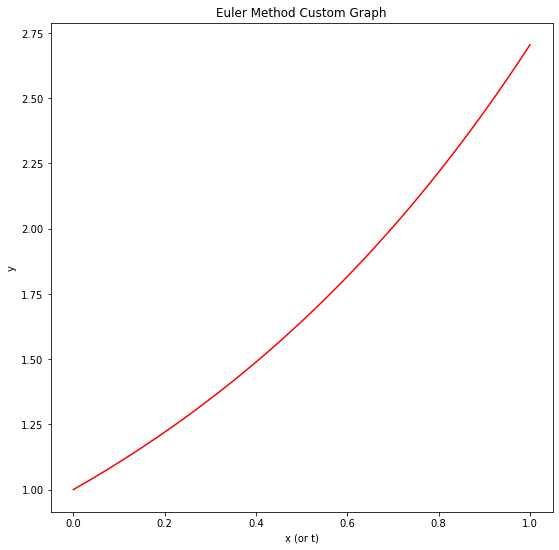

In [30]:
#plotting code adapated from NRPy "Solving the Scalar Wave Equation"
import matplotlib.pyplot as plt

positionList = []

#truthList0 = []
#uncomment or add more if validation is desired.

calculatedList0 = []
#calculatedList1 = []
#uncomment for plotting more than one value. 

#errorList0 = []
#uncomment for lists to store errors. 

#i = 0
#Use this i if a check has to be performed as to which row we're on. 

# csv file interface from https://www.dataquest.io/blog/read-file-python/
import csv
import sys
# https://stackoverflow.com/questions/2753254/how-to-open-a-file-in-the-parent-directory-in-python-in-appengine
# to make sure we get the right file. 
with open('oData.txt') as f: # this file was added manually to the folder, it was created from an Excel document. 
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        positionList.append(float(row[1]))
        calculatedList0.append(float(row[3]))

fig, ax = plt.subplots()

#Here is where you would do any post-processing. Remember, use np.array() on the lists so operations
#can be performed properly. 

#Remember to change labels!
ax.set_xlabel('x (or t)')
ax.set_ylabel('y')
ax.set_title(key + ' Method Custom Graph')
ax.plot(positionList, calculatedList0, color='r') # marker='o' (or whatever symbol) can be added here. 

fig.set_size_inches(9,9)
#plt.xlim(0.0,1.0)
#plt.ylim(0.0,1.0)
#The above two lines can control the region of the graph displayed. Comment out for auto scaling. 

#ax.set_yscale("log") #found in matplotlib's documentation. 
#Uncommenting this sets the scale to logarithmic. 

Below is just a duplicate of the same graphing code but on a log scale. Since by default we have no error or truth to refer to, we can't have an automatically appearing error graph here, alas. 

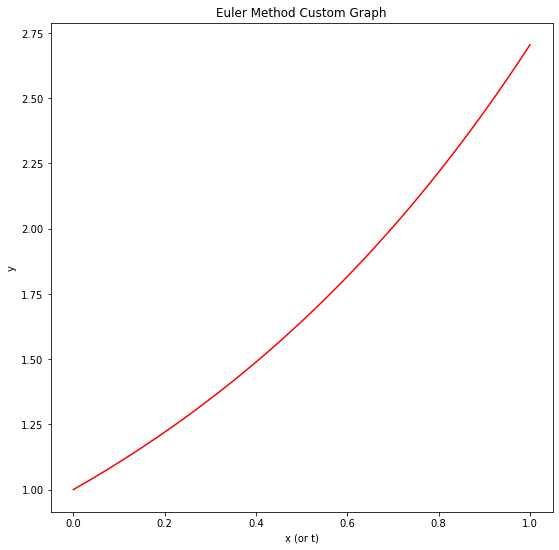

In [31]:
#plotting code adapated from NRPy "Solving the Scalar Wave Equation"
import matplotlib.pyplot as plt

positionList = []

#truthList0 = []
#uncomment or add more if validation is desired.

calculatedList0 = []
#calculatedList1 = []
#uncomment for plotting more than one value. 

#errorList0 = []
#uncomment for lists to store errors. 

#i = 0
#Use this i if a check has to be performed as to which row we're on. 

# csv file interface from https://www.dataquest.io/blog/read-file-python/
import csv
import sys
# https://stackoverflow.com/questions/2753254/how-to-open-a-file-in-the-parent-directory-in-python-in-appengine
# to make sure we get the right file. 
with open('oData.txt') as f: # this file was added manually to the folder, it was created from an Excel document. 
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        positionList.append(float(row[1]))
        calculatedList0.append(float(row[3]))

fig, ax = plt.subplots()

#Here is where you would do any post-processing. Remember, use np.array() on the lists so operations
#can be performed properly. 

#Remember to change labels!
ax.set_xlabel('x (or t)')
ax.set_ylabel('y')
ax.set_title(key + ' Method Custom Graph')
ax.plot(positionList, calculatedList0, color='r') # marker='o' (or whatever symbol) can be added here. 

fig.set_size_inches(9,9)
#plt.xlim(0.0,1.0)
#plt.ylim(0.0,1.0)
#The above two lines can control the region of the graph displayed. Comment out for auto scaling. 

#ax.set_yscale("log") #found in matplotlib's documentation. 
#Uncommenting this sets the scale to logarithmic. 

<a id='S6'></a>

# Step 6: Conclusion \[Back to [top](#toc)\]
$$\label{S6}$$

#### So, what have we learned today?

Now that we have arrived at the end, what now? Well, we are reasonably confident that all the methods are coded correctly and that the solver is accurate. Both the simple and complicated examples resolved very well, and the notebook is set up to allow the third section to be customized to any user's heart's content. 

In the future, we need to do the following:

1) Adaptive Time Step inclusion. 

2) More user-friendly interface with Python, rather than entering C-codes in manually. 

3) GSL Formatting

3) Questions/Exercises

<a id='S7'></a>

# Step 7: Questions/Exercises \[Back to [top](#toc)\]
$$\label{S7}$$

#### POP QUIZ! 

This is a placeholder for now, may not even be in the final notebook. Can't really be done until we know everything we might want to put here anyway. 

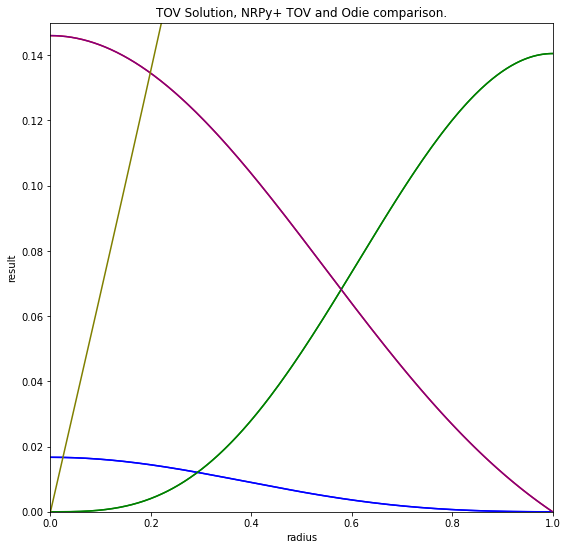

In [41]:
#plotting code adapated from NRPy "Solving the Scalar Wave Equation"
import matplotlib.pyplot as plt

positionList = []
calculatedList0 = []
calculatedList1 = []
calculatedList2 = []
calculatedList3 = []

# csv file interface from https://www.dataquest.io/blog/read-file-python/
import csv
import sys
# https://stackoverflow.com/questions/2753254/how-to-open-a-file-in-the-parent-directory-in-python-in-appengine
# to make sure we get the right file. 
with open(sys.path[0] + '/outputTOVpolytropeMedium.txt') as f: #data from NRPy+ TOV Solver
    reader = csv.reader(f, delimiter=' ')
    for row in reader:
        positionList.append(float(row[0]))
        calculatedList0.append(float(row[3]))
        calculatedList1.append(float(row[1]))
        calculatedList2.append(float(row[4]))
        calculatedList3.append(float(row[7]))

fig, ax = plt.subplots()
ax.set_xlabel('radius')
ax.set_ylabel('result')
ax.set_title('TOV Solution, NRPy+ TOV and Odie comparison.')

apositionList = []
acalculatedList0 = []
acalculatedList1 = []
acalculatedList2 = []
acalculatedList3 = []
acalculatedList4 = []

with open(sys.path[0] + '/oData.txt') as f: 
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        apositionList.append(float(row[1]))
        acalculatedList0.append(float(row[3]))
        acalculatedList1.append(float(row[5]))
        acalculatedList2.append(float(row[7]))
        acalculatedList3.append(float(row[9]))
        acalculatedList4.append(float(row[11]))

R_Schw    = apositionList[-1]
M         = acalculatedList2[-1]
Rbar_Schw = acalculatedList3[-1]
        
ax.plot(np.array(positionList)/R_Schw, calculatedList0, color='b') 
ax.plot(np.array(positionList)/R_Schw, calculatedList1, color='r') 
ax.plot(np.array(positionList)/R_Schw, calculatedList2, color='g') 
#ax.plot(np.array(positionList)/R_Schw, calculatedList3, color='olive') 

ax.plot(np.array(apositionList)/R_Schw, acalculatedList0, color='b') 
ax.plot(np.array(apositionList)/R_Schw, acalculatedList2, color='g') 
ax.plot(np.array(apositionList)/R_Schw, acalculatedList4, color='purple') 

#Calculate the normalization constant
C = 0.5*(np.sqrt(R_Schw*(R_Schw - 2.0*M)) + R_Schw - M) / Rbar_Schw

ax.plot(np.array(apositionList)/R_Schw, np.array(acalculatedList3)*C, color='olive') 


plt.ylim(0.0,0.15)
plt.xlim(0.0,1)
fig.set_size_inches(9,9)

1.1394052822159573


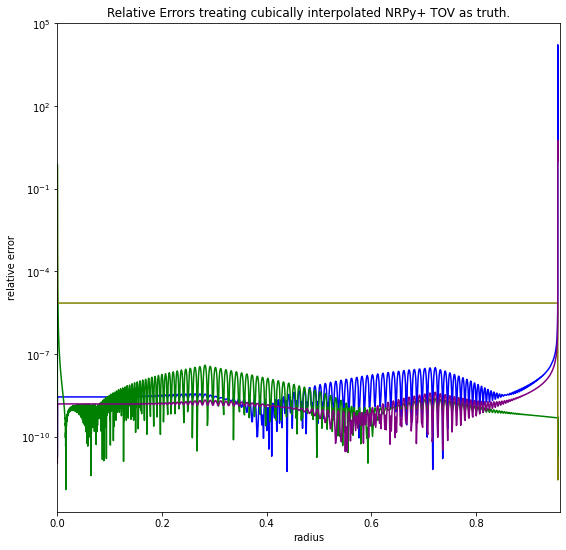

In [42]:
#plotting code adapated from NRPy "Solving the Scalar Wave Equation"
import matplotlib.pyplot as plt
import scipy.interpolate as scy
import numpy as np

positionList = []
calculatedList0 = []
calculatedList1 = []
calculatedList2 = []
calculatedList3 = []

# csv file interface from https://www.dataquest.io/blog/read-file-python/
import csv
import sys
# https://stackoverflow.com/questions/2753254/how-to-open-a-file-in-the-parent-directory-in-python-in-appengine
# to make sure we get the right file. 
with open(sys.path[0] + '/outputTOVpolytropeMedium.txt') as f: #data from NRPy+ TOV Solver
    reader = csv.reader(f, delimiter=' ')
    for row in reader:
        positionList.append(float(row[0]))
        calculatedList0.append(float(row[3]))
        calculatedList1.append(float(row[1]))
        calculatedList2.append(float(row[4]))
        calculatedList3.append(float(row[7]))

apositionList = []
acalculatedList0 = []
acalculatedList1 = []
acalculatedList2 = []
acalculatedList3 = []
acalculatedList4 = []

with open(sys.path[0] + '/oData.txt') as f: 
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        apositionList.append(float(row[1]))
        acalculatedList0.append(float(row[3]))
        acalculatedList1.append(float(row[5]))
        acalculatedList2.append(float(row[7]))
        acalculatedList3.append(float(row[9]))
        acalculatedList4.append(float(row[11]))

fig, ax = plt.subplots()
ax.set_xlabel('radius')
ax.set_ylabel('relative error')
ax.set_title('Relative Errors treating cubically interpolated NRPy+ TOV as truth.')

R_Schw    = apositionList[-1]
M         = acalculatedList2[-1]
Rbar_Schw = acalculatedList3[-1]

aR_Schw    = 9.788866381773926e-01
aM         = 1.405030336771405e-01
aRbar_Schw = acalculatedList3[-1]

C = 0.5*(np.sqrt(R_Schw*(R_Schw - 2.0*M)) + R_Schw - M) / Rbar_Schw
#C = 0.6998108895130731
print(C)

interpList0 = scy.interp1d(positionList, np.array(calculatedList0))
xNew = np.arange(0.63,0.8)
yNew = interpList0(np.arange(0.63,0.8))

#here is the interpolation. Admittedly not entirely sure how this all works, but here goes. 
from scipy import interpolate
x0 = np.array(positionList)
y0 = np.array(calculatedList0) #collect x and y values for the "truth" values. 
f0 = interpolate.interp1d(x0, y0, "cubic") #interpolate cubically between them. 
xnew = apositionList #Make the step size equal to our solver's.
xnew.pop(0)
ynew = f0(xnew)   # use interpolation function returned by `interp1d` to get "truth" values
ynew2 = acalculatedList0 #manually put our solver's values in, we wish to avoid double interpolating
ynew2.pop(0) #the first value, printed at r=0, is not reported in the NRPy+ solver, get rid of it. 
#1:20 + 45 = 2:05
plt.plot(xnew, abs((ynew-ynew2)/ynew), 'blue')

from scipy import interpolate
x2 = np.array(positionList)
y2 = np.array(calculatedList2)
f2 = interpolate.interp1d(x2, y2, "cubic")
ynew = f2(xnew)   # use interpolation function returned by `interp1d`
ynew2 = acalculatedList2
ynew2.pop(0) #the first value, printd at zero, is not reported in the NRPy+ solver, get rid of it.
plt.plot(xnew, abs((ynew-ynew2)/ynew), 'green')

from scipy import interpolate
x3 = np.array(positionList)
y3 = np.array(calculatedList3)
f3 = interpolate.interp1d(x3, y3, "cubic")
ynew = f3(xnew)   # use interpolation function returned by `interp1d`
ynew2 = acalculatedList3
ynew2.pop(0) #the first value, printd at zero, is not reported in the NRPy+ solver, get rid of it.
plt.plot(xnew, abs((ynew-np.array(ynew2)*C)/ynew), 'olive')

from scipy import interpolate
x4 = np.array(positionList)
y4 = np.array(calculatedList1)
f4 = interpolate.interp1d(x4, y4, "cubic")
ynew = f4(xnew)   # use interpolation function returned by `interp1d`
ynew2 = acalculatedList4
ynew2.pop(0) #the first value, printd at zero, is not reported in the NRPy+ solver, get rid of it
plt.plot(xnew, abs((ynew-ynew2)/ynew), 'purple')

# plt.ylim(0,0.001)
plt.xlim(0.0,0.96)
# https://stackoverflow.com/questions/332289/how-do-i-change-the-size-of-figures-drawn-with-matplotlib 
# setting size was annoying.
fig.set_size_inches(9,9)
ax.set_yscale("log") #found in matplotlib's documentation.

1.1394052822159573


/tmp/ipykernel_48799/3722506835.py:82: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(xnew, abs((ynew-ynew2)/ynew), 'green')
/tmp/ipykernel_48799/3722506835.py:90: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(xnew, abs((np.array(ynew)*C-np.array(ynew2)*aC)/np.array(ynew)*C), 'olive')


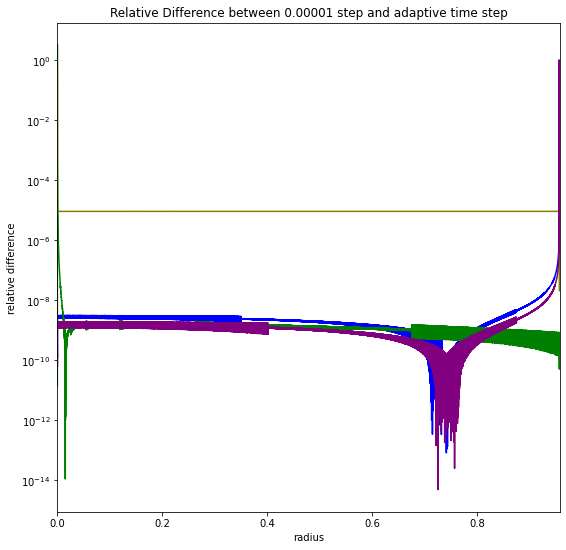

In [43]:
#plotting code adapated from NRPy "Solving the Scalar Wave Equation"
import matplotlib.pyplot as plt
import scipy.interpolate as scy
import numpy as np

positionList = []
calculatedList0 = []
calculatedList1 = []
calculatedList2 = []
calculatedList3 = []

# csv file interface from https://www.dataquest.io/blog/read-file-python/
import csv
import sys
# https://stackoverflow.com/questions/2753254/how-to-open-a-file-in-the-parent-directory-in-python-in-appengine
# to make sure we get the right file. 
#with open(sys.path[0] + '/outputTOVpolytrope.txt') as f: #data from NRPy+ TOV Solver
with open(sys.path[0] + '/oData.txt') as f: #Secondary data
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        positionList.append(float(row[1]))
        calculatedList0.append(float(row[3]))
        calculatedList1.append(float(row[11]))
        calculatedList2.append(float(row[7]))
        calculatedList3.append(float(row[9]))

apositionList = []
acalculatedList0 = []
acalculatedList1 = []
acalculatedList2 = []
acalculatedList3 = []
acalculatedList4 = []

with open(sys.path[0] + '/oData2.txt') as f: 
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        apositionList.append(float(row[1]))
        acalculatedList0.append(float(row[3]))
        acalculatedList1.append(float(row[5]))
        acalculatedList2.append(float(row[7]))
        acalculatedList3.append(float(row[9]))
        acalculatedList4.append(float(row[11]))

fig, ax = plt.subplots()
ax.set_xlabel('radius')
ax.set_ylabel('relative difference')
ax.set_title('Relative Difference between 0.00001 step and adaptive time step')

aR_Schw    = apositionList[-1]
aM         = acalculatedList2[-1]
aRbar_Schw = acalculatedList3[-1]

R_Schw    = positionList[-1]
M         = calculatedList2[-1]
Rbar_Schw = calculatedList3[-1]

C = 0.5*(np.sqrt(R_Schw*(R_Schw - 2.0*M)) + R_Schw - M) / Rbar_Schw
aC = 0.5*(np.sqrt(aR_Schw*(aR_Schw - 2.0*aM)) + aR_Schw - aM) / aRbar_Schw
#C = 0.6998108895130731
print(C)

interpList0 = scy.interp1d(positionList, np.array(calculatedList0))
xNew = np.arange(0.63,0.8)
yNew = interpList0(np.arange(0.63,0.8))

#here is the interpolation. Admittedly not entirely sure how this all works, but here goes. 
from scipy import interpolate
x0 = np.array(positionList)
y0 = np.array(calculatedList0) #collect x and y values for the "truth" values. 
f0 = interpolate.interp1d(x0, y0, "cubic") #interpolate cubically between them. 
xnew = apositionList #Make the step size equal to our solver's.
ynew = f0(xnew)   # use interpolation function returned by `interp1d` to get "truth" values
ynew2 = acalculatedList0 #manually put our solver's values in, we wish to avoid double interpolating
plt.plot(xnew, abs((ynew-ynew2)/ynew), 'blue')

from scipy import interpolate
x2 = np.array(positionList)
y2 = np.array(calculatedList2)
f2 = interpolate.interp1d(x2, y2, "cubic")
ynew = f2(xnew)   # use interpolation function returned by `interp1d`
ynew2 = acalculatedList2
plt.plot(xnew, abs((ynew-ynew2)/ynew), 'green')

from scipy import interpolate
x3 = np.array(positionList)
y3 = np.array(calculatedList3)
f3 = interpolate.interp1d(x3, y3, "cubic")
ynew = f3(xnew)   # use interpolation function returned by `interp1d`
ynew2 = acalculatedList3
plt.plot(xnew, abs((np.array(ynew)*C-np.array(ynew2)*aC)/np.array(ynew)*C), 'olive')

from scipy import interpolate
x4 = np.array(positionList)
y4 = np.array(calculatedList1)
f4 = interpolate.interp1d(x4, y4, "cubic")
ynew = f4(xnew)   # use interpolation function returned by `interp1d`
ynew2 = acalculatedList4
plt.plot(xnew, abs((ynew-ynew2)/ynew), 'purple')

#ax.plot(positionList, np.array(calculatedList3)*aC, color='olive') 
#ax.plot(apositionList, np.array(acalculatedList3)*C, color='olive') 

# plt.ylim(0,0.001)
plt.xlim(0.0,0.957)
# https://stackoverflow.com/questions/332289/how-do-i-change-the-size-of-figures-drawn-with-matplotlib 
# setting size was annoying.
fig.set_size_inches(9,9)
ax.set_yscale("log") #found in matplotlib's documentation.

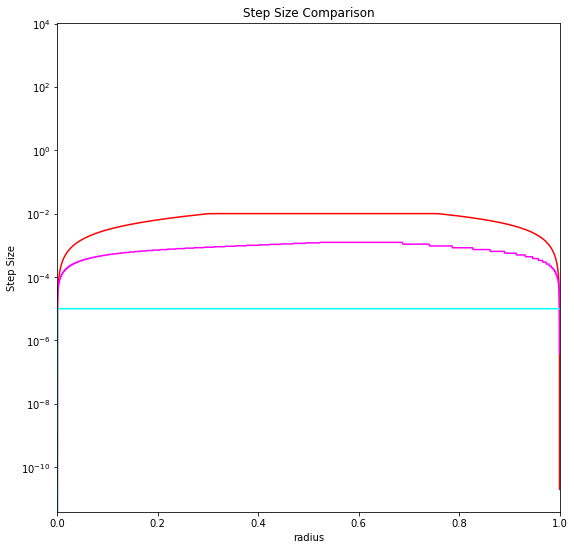

In [44]:
#plotting code adapated from NRPy "Solving the Scalar Wave Equation"
import matplotlib.pyplot as plt

positionListVeryLow = []
positionListLow = []
positionListMedium = []
positionListHigh = []
positionListVeryHigh = []
positionListODE = []
positionListODE2 = []

# csv file interface from https://www.dataquest.io/blog/read-file-python/
import csv
import sys
# https://stackoverflow.com/questions/2753254/how-to-open-a-file-in-the-parent-directory-in-python-in-appengine
# to make sure we get the right file. 
#with open(sys.path[0] + '/outputTOVpolytropeVeryLow.txt') as f: #data from NRPy+ TOV Solver
#    reader = csv.reader(f, delimiter=' ')
#    for row in reader:
#        positionListVeryLow.append(float(row[0]))
        
#with open(sys.path[0] + '/outputTOVpolytropeLow.txt') as f: #data from NRPy+ TOV Solver
#    reader = csv.reader(f, delimiter=' ')
#    for row in reader:
#        positionListLow.append(float(row[0]))
        
with open(sys.path[0] + '/outputTOVpolytropeMedium.txt') as f: #data from NRPy+ TOV Solver
    reader = csv.reader(f, delimiter=' ')
    for row in reader:
        positionListMedium.append(float(row[0]))
        
#with open(sys.path[0] + '/outputTOVpolytropeHigh.txt') as f: #data from NRPy+ TOV Solver
#    reader = csv.reader(f, delimiter=' ')
#    for row in reader:
#        positionListHigh.append(float(row[0]))
        
#with open(sys.path[0] + '/outputTOVpolytropeVeryHigh.txt') as f: #data from NRPy+ TOV Solver
#    reader = csv.reader(f, delimiter=' ')
#    for row in reader:
#        positionListVeryHigh.append(float(row[0]))
        
with open(sys.path[0] + '/oData.txt') as f: #data from NRPy+ TOV Solver
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        positionListODE.append(float(row[1]))

with open(sys.path[0] + '/oData2.txt') as f: #data from NRPy+ TOV Solver
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        positionListODE2.append(float(row[1]))   
        
dpositionListVeryLow = []
dpositionListLow = []
dpositionListMedium = []
dpositionListHigh = []
dpositionListVeryHigh = []
dpositionListODE = []
dpositionListODE2 = []

#i = 0
#while i < len(positionListVeryLow):
#    if (i == 0):
#        dpositionListVeryLow.append(0.0)
#    else :
#        dpositionListVeryLow.append(positionListVeryLow[i] - positionListVeryLow[i-1])
#    i = i + 1
    
#i = 0
#while i < len(positionListLow):
#    if (i == 0):
#        dpositionListLow.append(0.0)
#    else :
#        dpositionListLow.append(positionListLow[i] - positionListLow[i-1])
#    i = i + 1
    
i = 0
while i < len(positionListMedium):
    if (i == 0):
        dpositionListMedium.append(0.0)
    else :
        dpositionListMedium.append(positionListMedium[i] - positionListMedium[i-1])
    i = i + 1
    
#i = 0
#while i < len(positionListHigh):
#    if (i == 0):
#        dpositionListHigh.append(0.0)
#    else :
#        dpositionListHigh.append(positionListHigh[i] - positionListHigh[i-1])
#    i = i + 1
    
#i = 0
#while i < len(positionListVeryHigh):
#    if (i == 0):
#        dpositionListVeryHigh.append(0.0)
#    else :
#        dpositionListVeryHigh.append(positionListVeryHigh[i] - positionListVeryHigh[i-1])
#    i = i + 1

i = 0
while i < len(positionListODE):
    if (i == 0):
        dpositionListODE.append(0.0)
    else :
        dpositionListODE.append(positionListODE[i] - positionListODE[i-1])
    i = i + 1

i = 0
while i < len(positionListODE2):
    if (i == 0):
        dpositionListODE2.append(0.0)
    else :
        dpositionListODE2.append(positionListODE2[i] - positionListODE2[i-1])
    i = i + 1
    
fig, ax = plt.subplots()
ax.set_xlabel('radius')
ax.set_ylabel('Step Size')
ax.set_title('Step Size Comparison')

#ax.plot(positionListVeryLow, dpositionListVeryLow, color='b') 
#ax.plot(positionListLow, dpositionListLow, color='g') 
ax.plot(np.array(positionListMedium)/R_Schw, dpositionListMedium, color='r') 
#ax.plot(positionListHigh, dpositionListHigh, color='purple') 
#ax.plot(positionListVeryHigh, dpositionListVeryHigh, color='olive') 
ax.plot(np.array(positionListODE)/R_Schw, dpositionListODE, color='magenta') 
ax.plot(np.array(positionListODE2)/R_Schw, dpositionListODE2, color='cyan') 

#plt.ylim(0.0,0.15)
plt.xlim(0.0,1)
fig.set_size_inches(9,9)
ax.set_yscale("log") #found in matplotlib's documentation.

<a id='S8'></a>

# Step 8: Output this notebook to $\LaTeX$-formatted PDF file \[Back to [top](#toc)\]
$$\label{S8}$$

((This is currently not functional due to file hierarchy, when in the actual nrpytutorial repo it will work)). 

The following code cell converts this Jupyter notebook into a proper, clickable $\LaTeX$-formatted PDF file. After the cell is successfully run, the generated PDF may be found in the root NRPy+ tutorial directory, with filename
[OSESolver.pdf](ODESolver.pdf). (Note that clicking on this link may not work; you may need to open the PDF file through another means.)

In [ ]:
import cmdline_helper as cmd    # NRPy+: Multi-platform Python command-line interface
cmd.output_Jupyter_notebook_to_LaTeXed_PDF("ODESolverV3")